# ML@AIMAS 2024 - Day 1 - Analiza exploratorie a datelor (EDA)

Mihai Trăscău, Teodor Poncu, Florin Dumitrescu

În acest notebook vom studia metode puțin mai complexe de analiză exploratorie a datelor particularizate pentru un set de date real.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Încărcarea datelor

De cele mai multe ori, toate proiectele de tip `data-science` sunt legate de o `sursă de adevăr`, care este o bază de
 date SQL sau similar.
  - Interogările pentru analiza exploratorie sunt de obicei foarte complexe și paralele. Cu siguranță am dori să evităm 
  efectuarea acestora pe serverul de producție.
  - Suntem interesați de timpi de execuție / citire rapizi, așa că, de preferat, ar trebui să fie un mod de a stoca 
  datele în memorie.
  - Dorim să construim baza de date într-un mod cât mai declarativ, ceea ce poate implica o necesitate de procesare 
  mai mare.

`Apache Spark` (alternativ, `Snowflake`) este în general una dintre modalitățile preferate de a efectua acest pas de 
explorare / încărcare, însă pentru concizie vom folosi `Pandas`, care ne oferă o experiență similară în `Python`.


În exemplul de astăzi vom folosi un set de date public de pe `Kaggle` care conține informații despre prețurile 
caselor din Ames, Iowa: 
- [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


In [2]:
# Citim datele în format .csv folosind Pandas
df = pd.read_csv('data/house_prices/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Ce vom face

Așa cum am menționat anterior, multe proiectelor implică lucrul cu date tabelare, iar `Pandas` ne oferă o modalitate 
de a vizualiza / utiliza acest tip de date.

## Primii pași

Indiferent de ceea ce plănuim să facem cu aceste date, primul pas este înțelegerea lor.
  - Similar cu modul în care optimizarea algoritmilor sau a arhitecturilor software se face prin înțelegerea  
  `pattern-urilor de execuție`, o `problemă de date` poate fi optimizată doar prin înțelegerea `datelor`. Prin asta 
  ne referim în principal la: 
    - `ce reprezintă datele noastre`
    - `cum sunt distribuite datele noastre`
    - `ce este o anomalie în datele noastre`
    - `ce date sunt importante`


### Ce reprezintă datele noastre

În cazul nostru, avem un set de date care conține informații despre casele din Ames, Iowa, fiecare coloană reprezentând
 un atribut care afecteză mai mult sau mai puțin prețul casei.

Pasul 1: aflăm ce informații avem despre datele noastre prin enumerarea coloanelor

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Pasul 2: aflăm ce tipuri de date avem

In [4]:
# Numărăm coloanele în funcție de tipul de date
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [5]:
# Examinăm coloanele de tip obiect
df.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [6]:
# Afișăm valorile unice pentru fiecare coloană de tip obiect
for col in df.select_dtypes('object').columns:
    print(col, df[col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

In [7]:
# Facem același lucru pentru coloanele de tip int64
df.select_dtypes('int64').columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Din cauză că în general coloanele care au tipuri de date numerice reprezintă atribute continue, nu vom afișa valorile
 acestora, ci doar câte valori unice există. Acest lucru este util pentru a vedea dacă printre aceste coloane 
 numerice avem și atribute discrete.

In [8]:
df.select_dtypes('int64').nunique().sort_values(ascending=True)

BsmtHalfBath        3
HalfBath            3
BsmtFullBath        4
Fireplaces          4
FullBath            4
KitchenAbvGr        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

In [9]:
# Afișăm valorile unice pentru fiecare coloană de tip int64 care are mai puțin de 10 valori unice
for col in df.select_dtypes('int64').columns:
    if df[col].nunique() <= 10:
        print(col, df[col].unique())

OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
BsmtFullBath [1 0 2 3]
BsmtHalfBath [0 1 2]
FullBath [2 1 3 0]
HalfBath [1 0 2]
BedroomAbvGr [3 4 1 2 0 5 6 8]
KitchenAbvGr [1 2 3 0]
Fireplaces [0 1 2 3]
GarageCars [2 3 1 0 4]
PoolArea [  0 512 648 576 555 480 519 738]
YrSold [2008 2007 2006 2009 2010]


# Câteva concluzii

Majoritatea codificărilor sunt de fapt doar o modalitate de a reprezenta `date categorice`.
  - Uneori aceste date pot avea un fel de ordine implicită: `OverallQual [ 7  6  8  5  9  4 10  3  1  2]`
  - Alteori poate fi complet fals: `Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']`
  - În alte cazuri, reprezintă un fel de valoare cuantificabilă din lumea reală care este restricționată în ceea ce privește valoarea pe care o poate avea: `YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 ...]`

Din păcate, nu putem trage concluzii doar prin observarea sumară a valorilor. Din acest motiv, dorim să vedem modul 
în care sunt distribuite valorile pentru fiecare coloană și ce corelări există între acestea într-un mod empiric.

In [10]:
N_FEATURES = 5  # Numărul de atribute pe care dorim să le vizualizăm

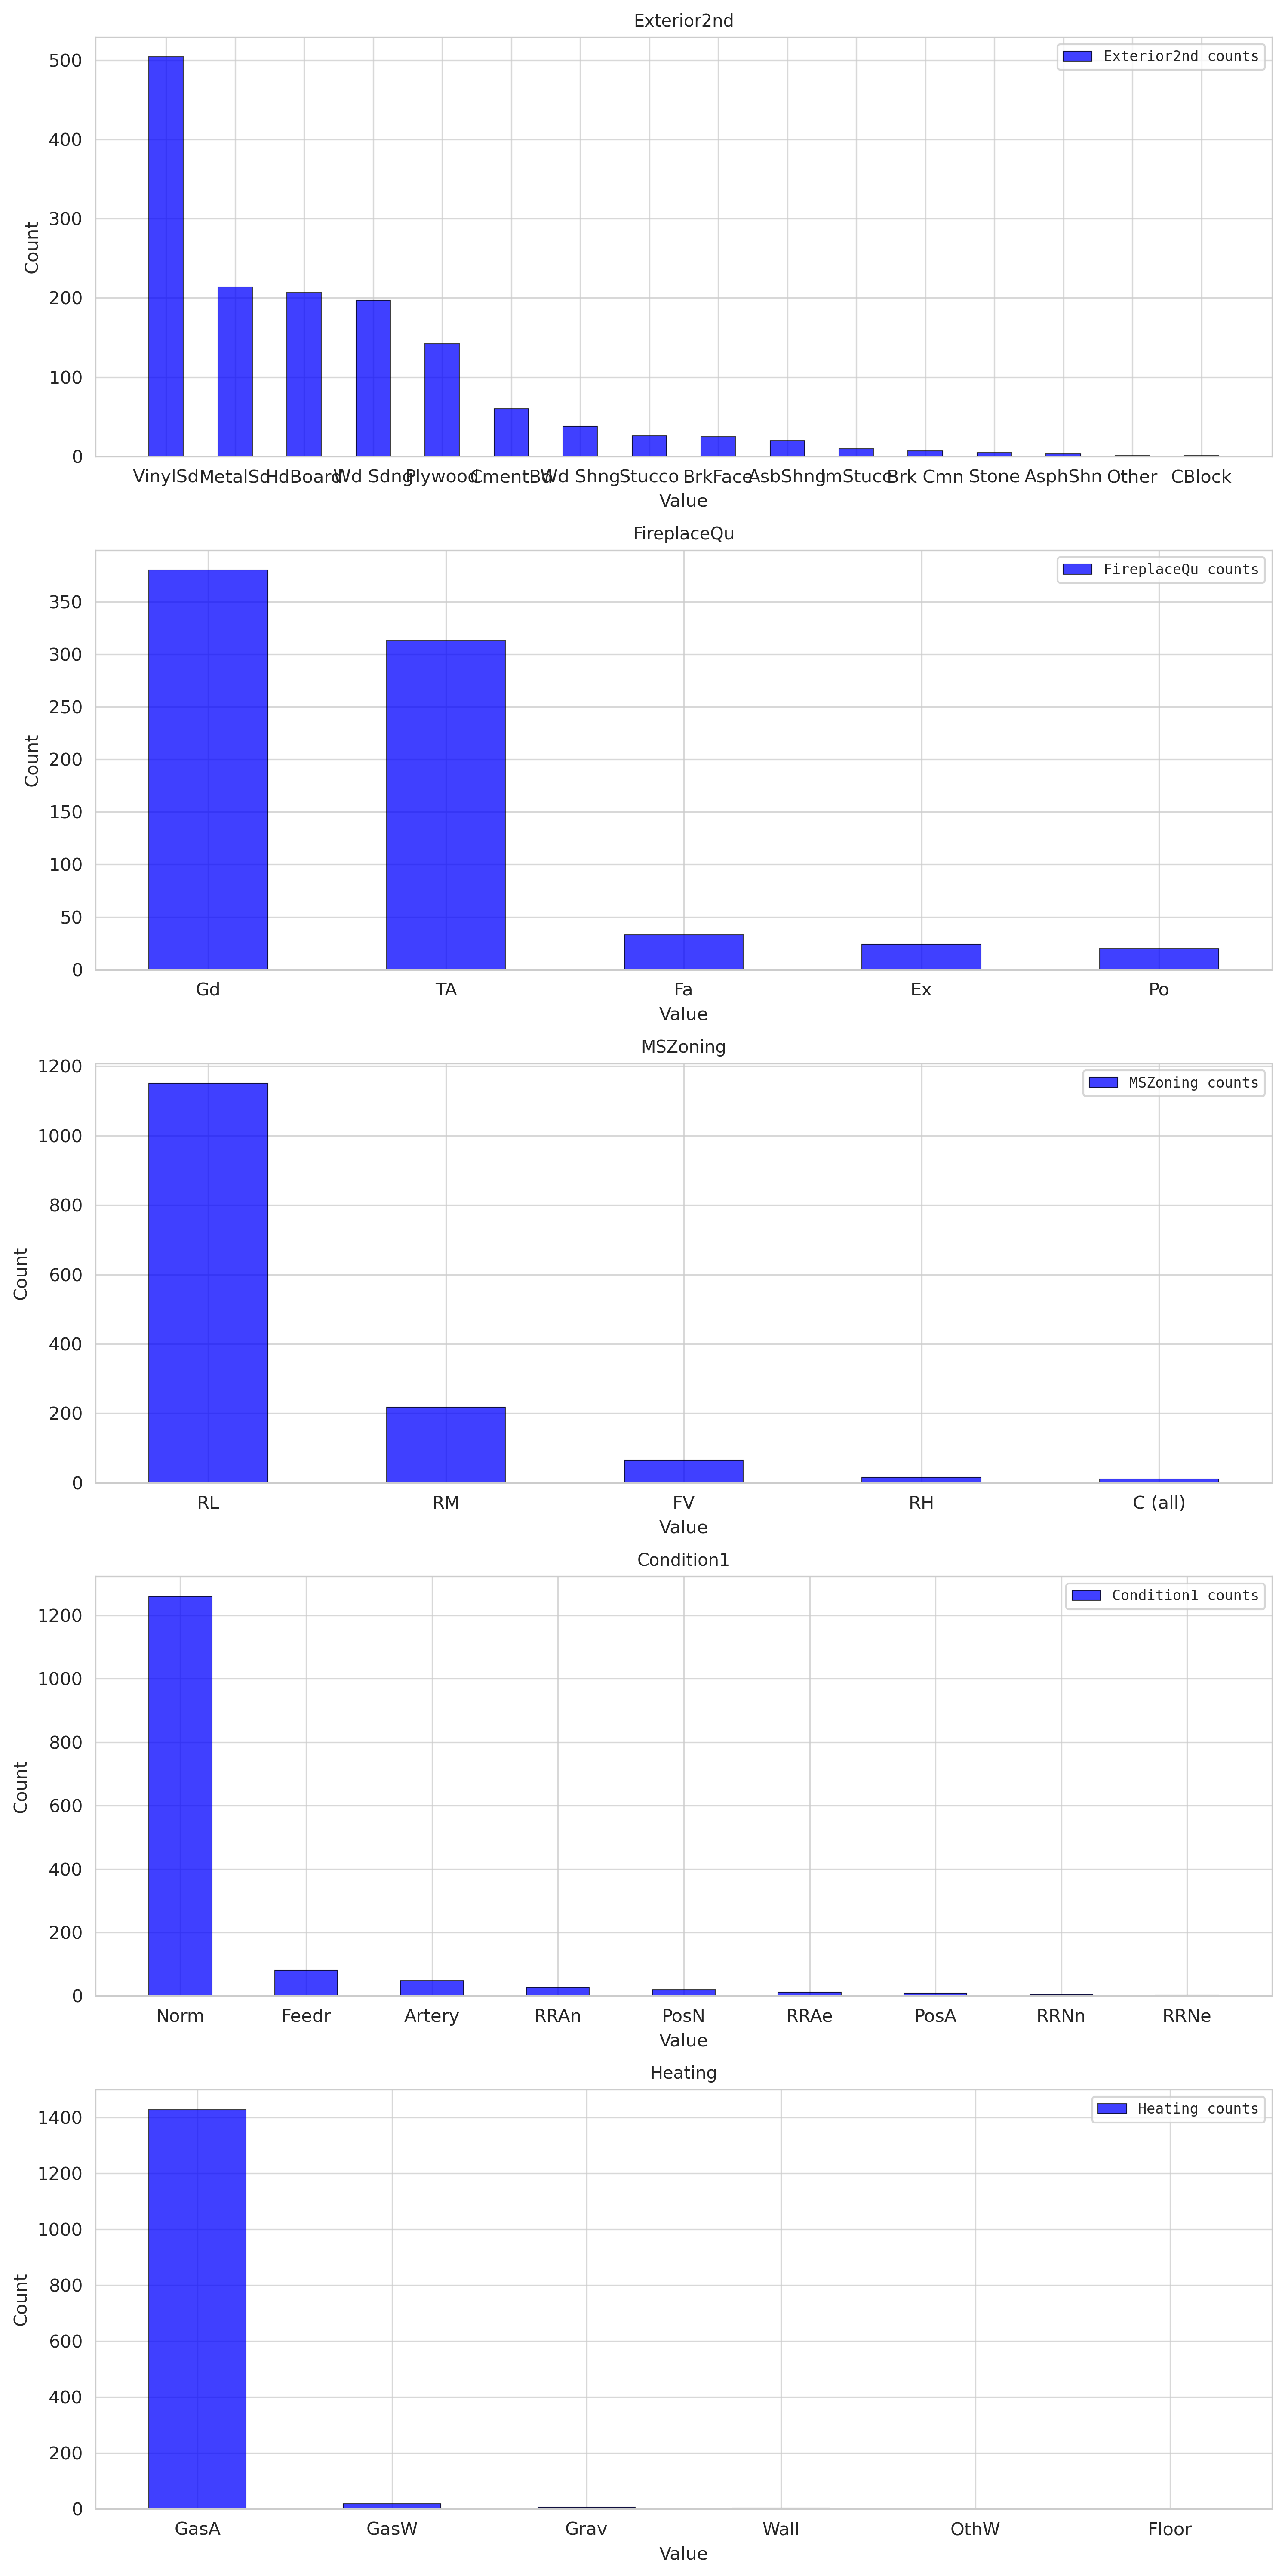

In [11]:
# Selectăm câteva atribute categorice pe care dorim să le vizualizăm
cols = df.select_dtypes('object').columns
cols = np.random.choice(cols, N_FEATURES, replace=False)

# Facem un grafic pentru fiecare atribut categoric în care vom afișa 
# distribuția de exemple pentru fiecare valoare
fig, ax = plt.subplots(N_FEATURES, 1, figsize=(10, 20), dpi=300)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 8

for idx, col in enumerate(cols):
    counts = df[col].value_counts()
    ax[idx].bar(counts.index, counts.values, alpha=0.75, label=f'{col} counts', color='blue', edgecolor='black', linewidth=0.5, width=0.5)
    ax[idx].set_title(col)
    ax[idx].set_ylabel('Count')
    ax[idx].set_xlabel('Value')
    ax[idx].grid(alpha=0.75)
    ax[idx].legend()
plt.tight_layout()
plt.show()

# Mai multe concluzii

Datele au de obicei pattern-uri dominante și distribuții inegale.
 - Așa cum se observă mai sus, unele dintre coloane au valori care sunt semnificativ mai numeroase decât altele.
 - În același timp, pentru unele dintre înregistrările noastre s-ar putea să avem valori lipsă.
  - Observați cum unele dintre atribute nu au un număr foarte mare de valori pe axa `Y`. De exemplu, `Alley` cel mult
   50 de valori pentru valoarea dominantă `Grvl`.
  - Aceste valori lipsă reprezintă o problemă care nu are o soluție clar stabilită. De aceea EDA (Analiza Exploratorie a Datelor) este atât de importantă.
    - Ne ajută să evaluăm dacă o coloană / caracteristică este utilă în luarea unei decizii informate.
    - Ne poate ajuta să cuantificăm cât de utilă este și dacă merită să investim în colectarea mai multor date.
    - Poate revela deficiențe în fluxurile noastre de date sau în calitatea proceselor noastre de colectare a datelor.

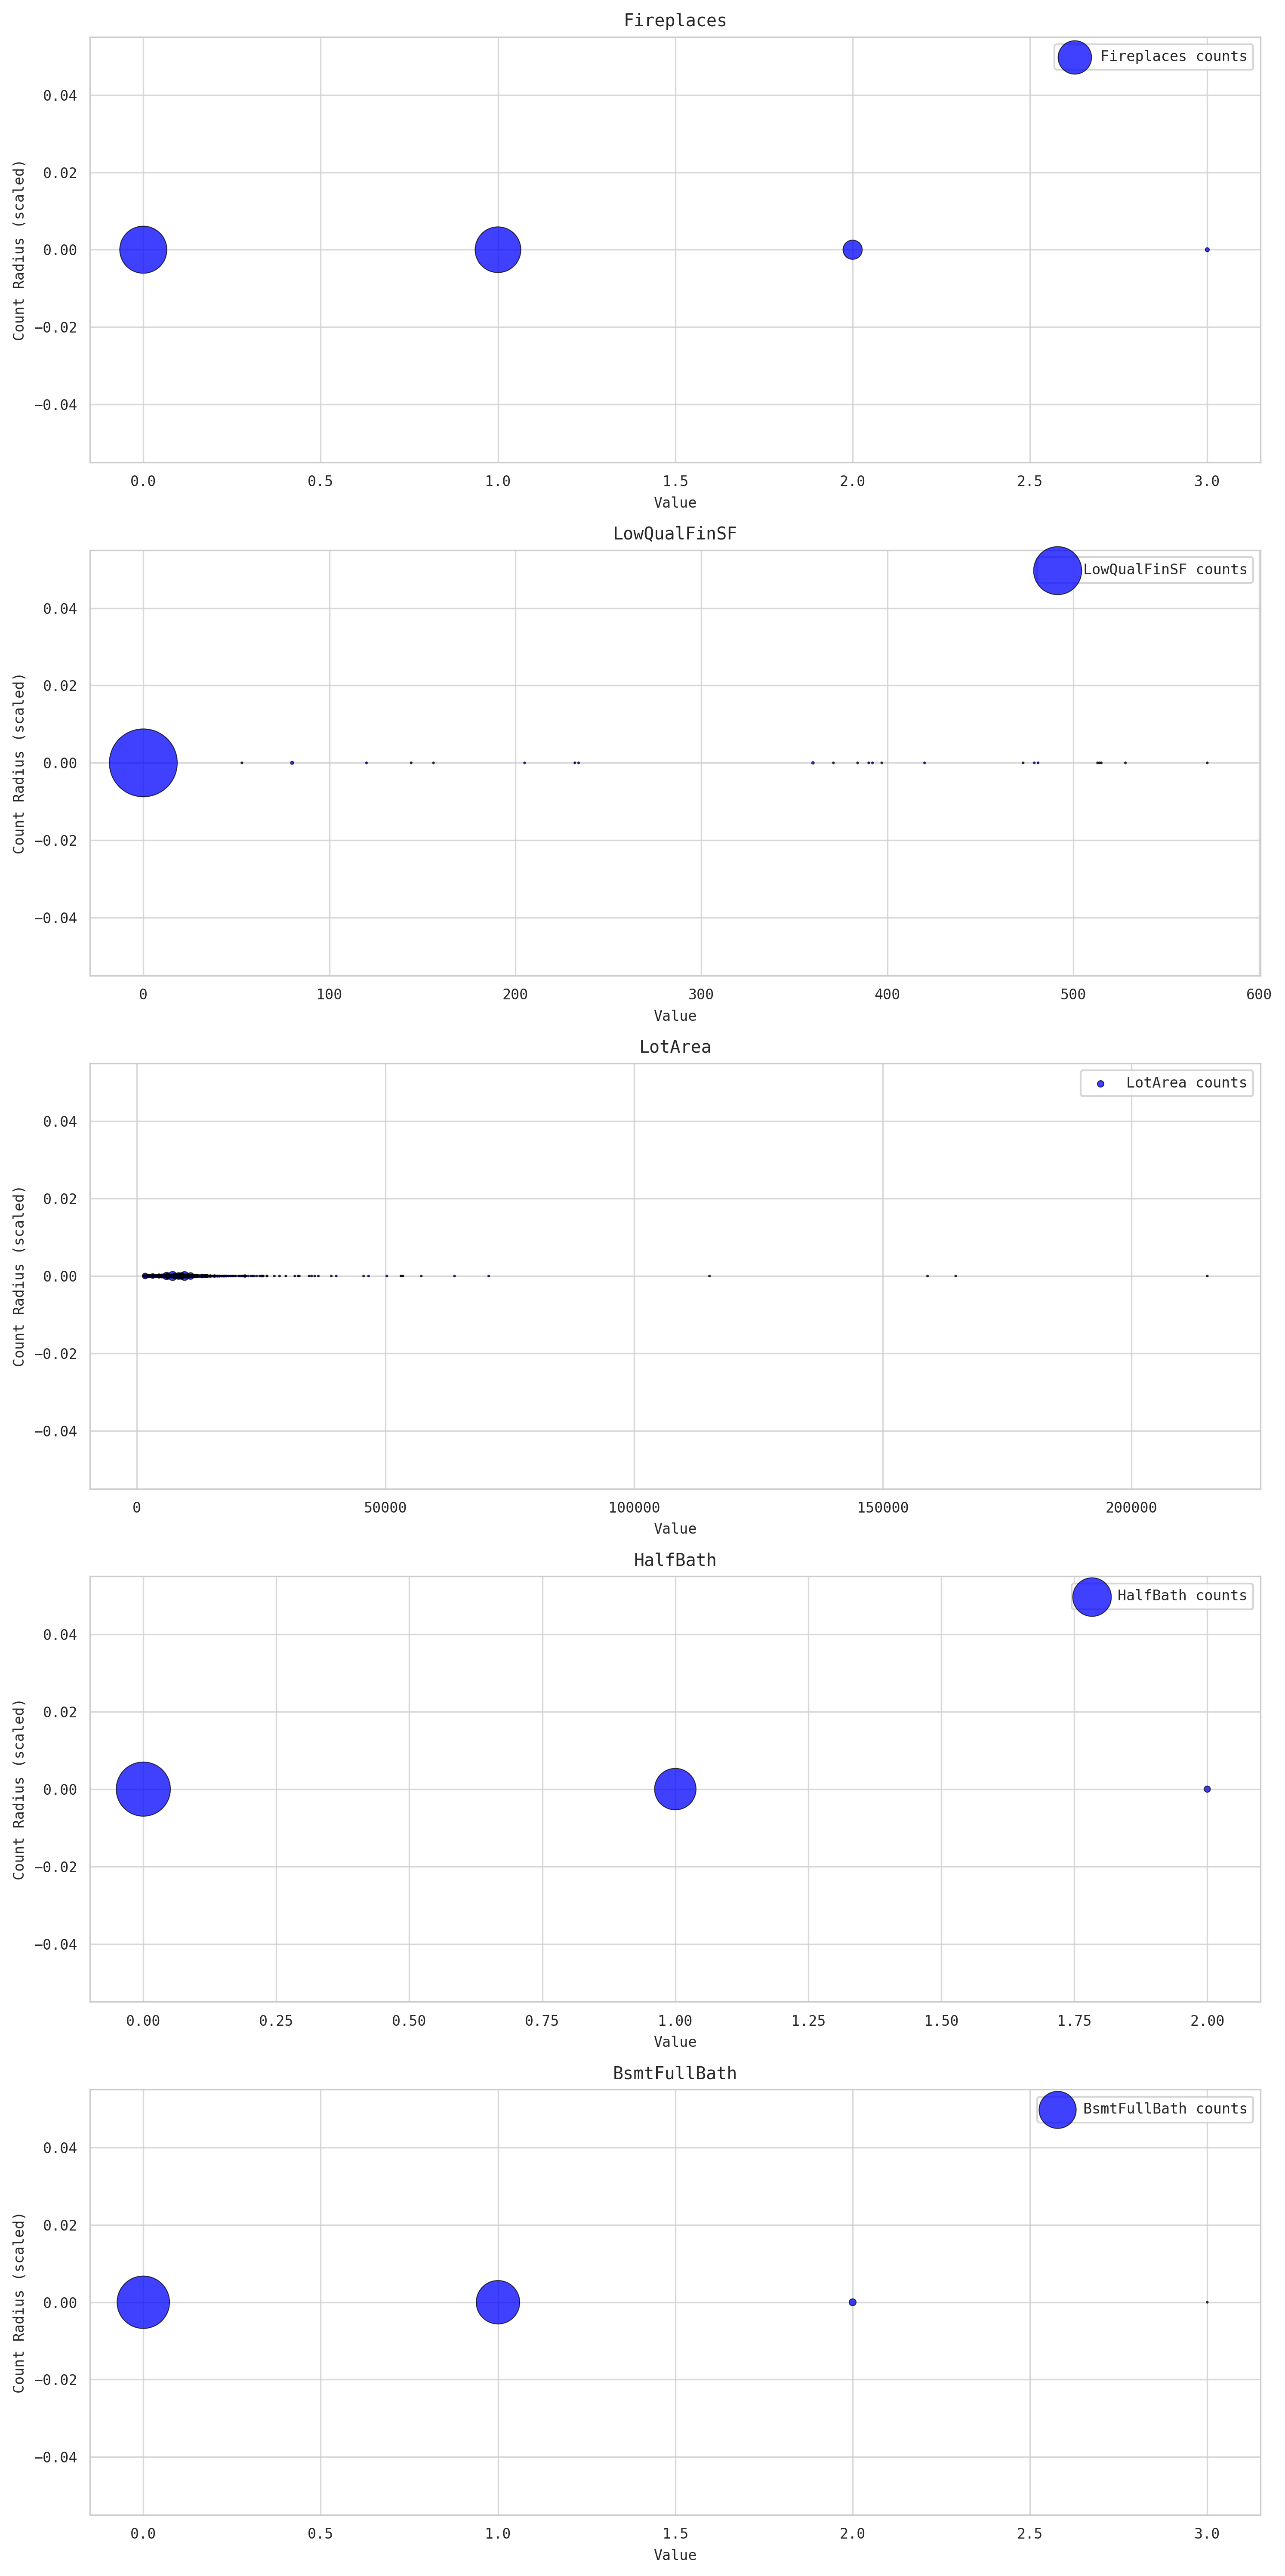

In [12]:
# Facem același lucru pentru atributele numerice
cols = df.select_dtypes('int64').columns
# Se elimină coloana `Id` deoarece nu este relevantă
cols = cols[1:]
cols = np.random.choice(cols, N_FEATURES, replace=False)
fig, ax = plt.subplots(N_FEATURES, 1, figsize=(10, 20), dpi=300)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 8
for idx, col in enumerate(cols):
    # Valorile identice vor fi concatenate pentru a fi mai ușor de vizualizat
    counts = df[col].value_counts()
    ax[idx].scatter(counts.index, np.zeros(len(counts)), alpha=0.75, label=f'{col} counts', color='blue', edgecolor='black', linewidth=0.5, s=counts.values)
    ax[idx].set_title(col)
    ax[idx].set_ylabel('Count Radius (scaled)')
    ax[idx].set_xlabel('Value')
    ax[idx].grid(alpha=0.75)
    ax[idx].legend()
plt.tight_layout()

# Distribuții

Caracteristicile numerice sunt puțin mai complicate.
  - Deoarece unele sunt valori `continue`, acestea ar putea avea distribuții care sunt uniform distribuite de-a lungul axei lor.
  - Când maschează o `codificare categorică`, s-ar putea să observăm aceleași pattern-uri dominante ca înainte.
  - În cazuri precum `YearRemodAdd`, s-ar putea să observăm categorii speciale de tip bucket, cum ar fi `1950`.
    - Acesta este ceva care ar fi considerat o `anomalie de funcționalitate` sau `anomalie de colectare`, deoarece cel 
    mai probabil a existat un factor limitator în fluxul de colectare.


## Management wants a feature

Management-ul dorește o funcționalitate care să faciliteze listarea proprietăților.
  - Având în vedere proprietățile pe care un proprietar le introduce, dorim ca platforma noastră să le propună un preț de listare.
  - Bazat pe acest preț de listare, proprietarii pot vedea proprietăți similare și pot alege un preț mai bun astfel încât să încheie o tranzacție mai rapid.
  - În același timp, cumpărătorii pot evalua mai rapid dacă proprietatea este listată corect în raport cu piața curentă.


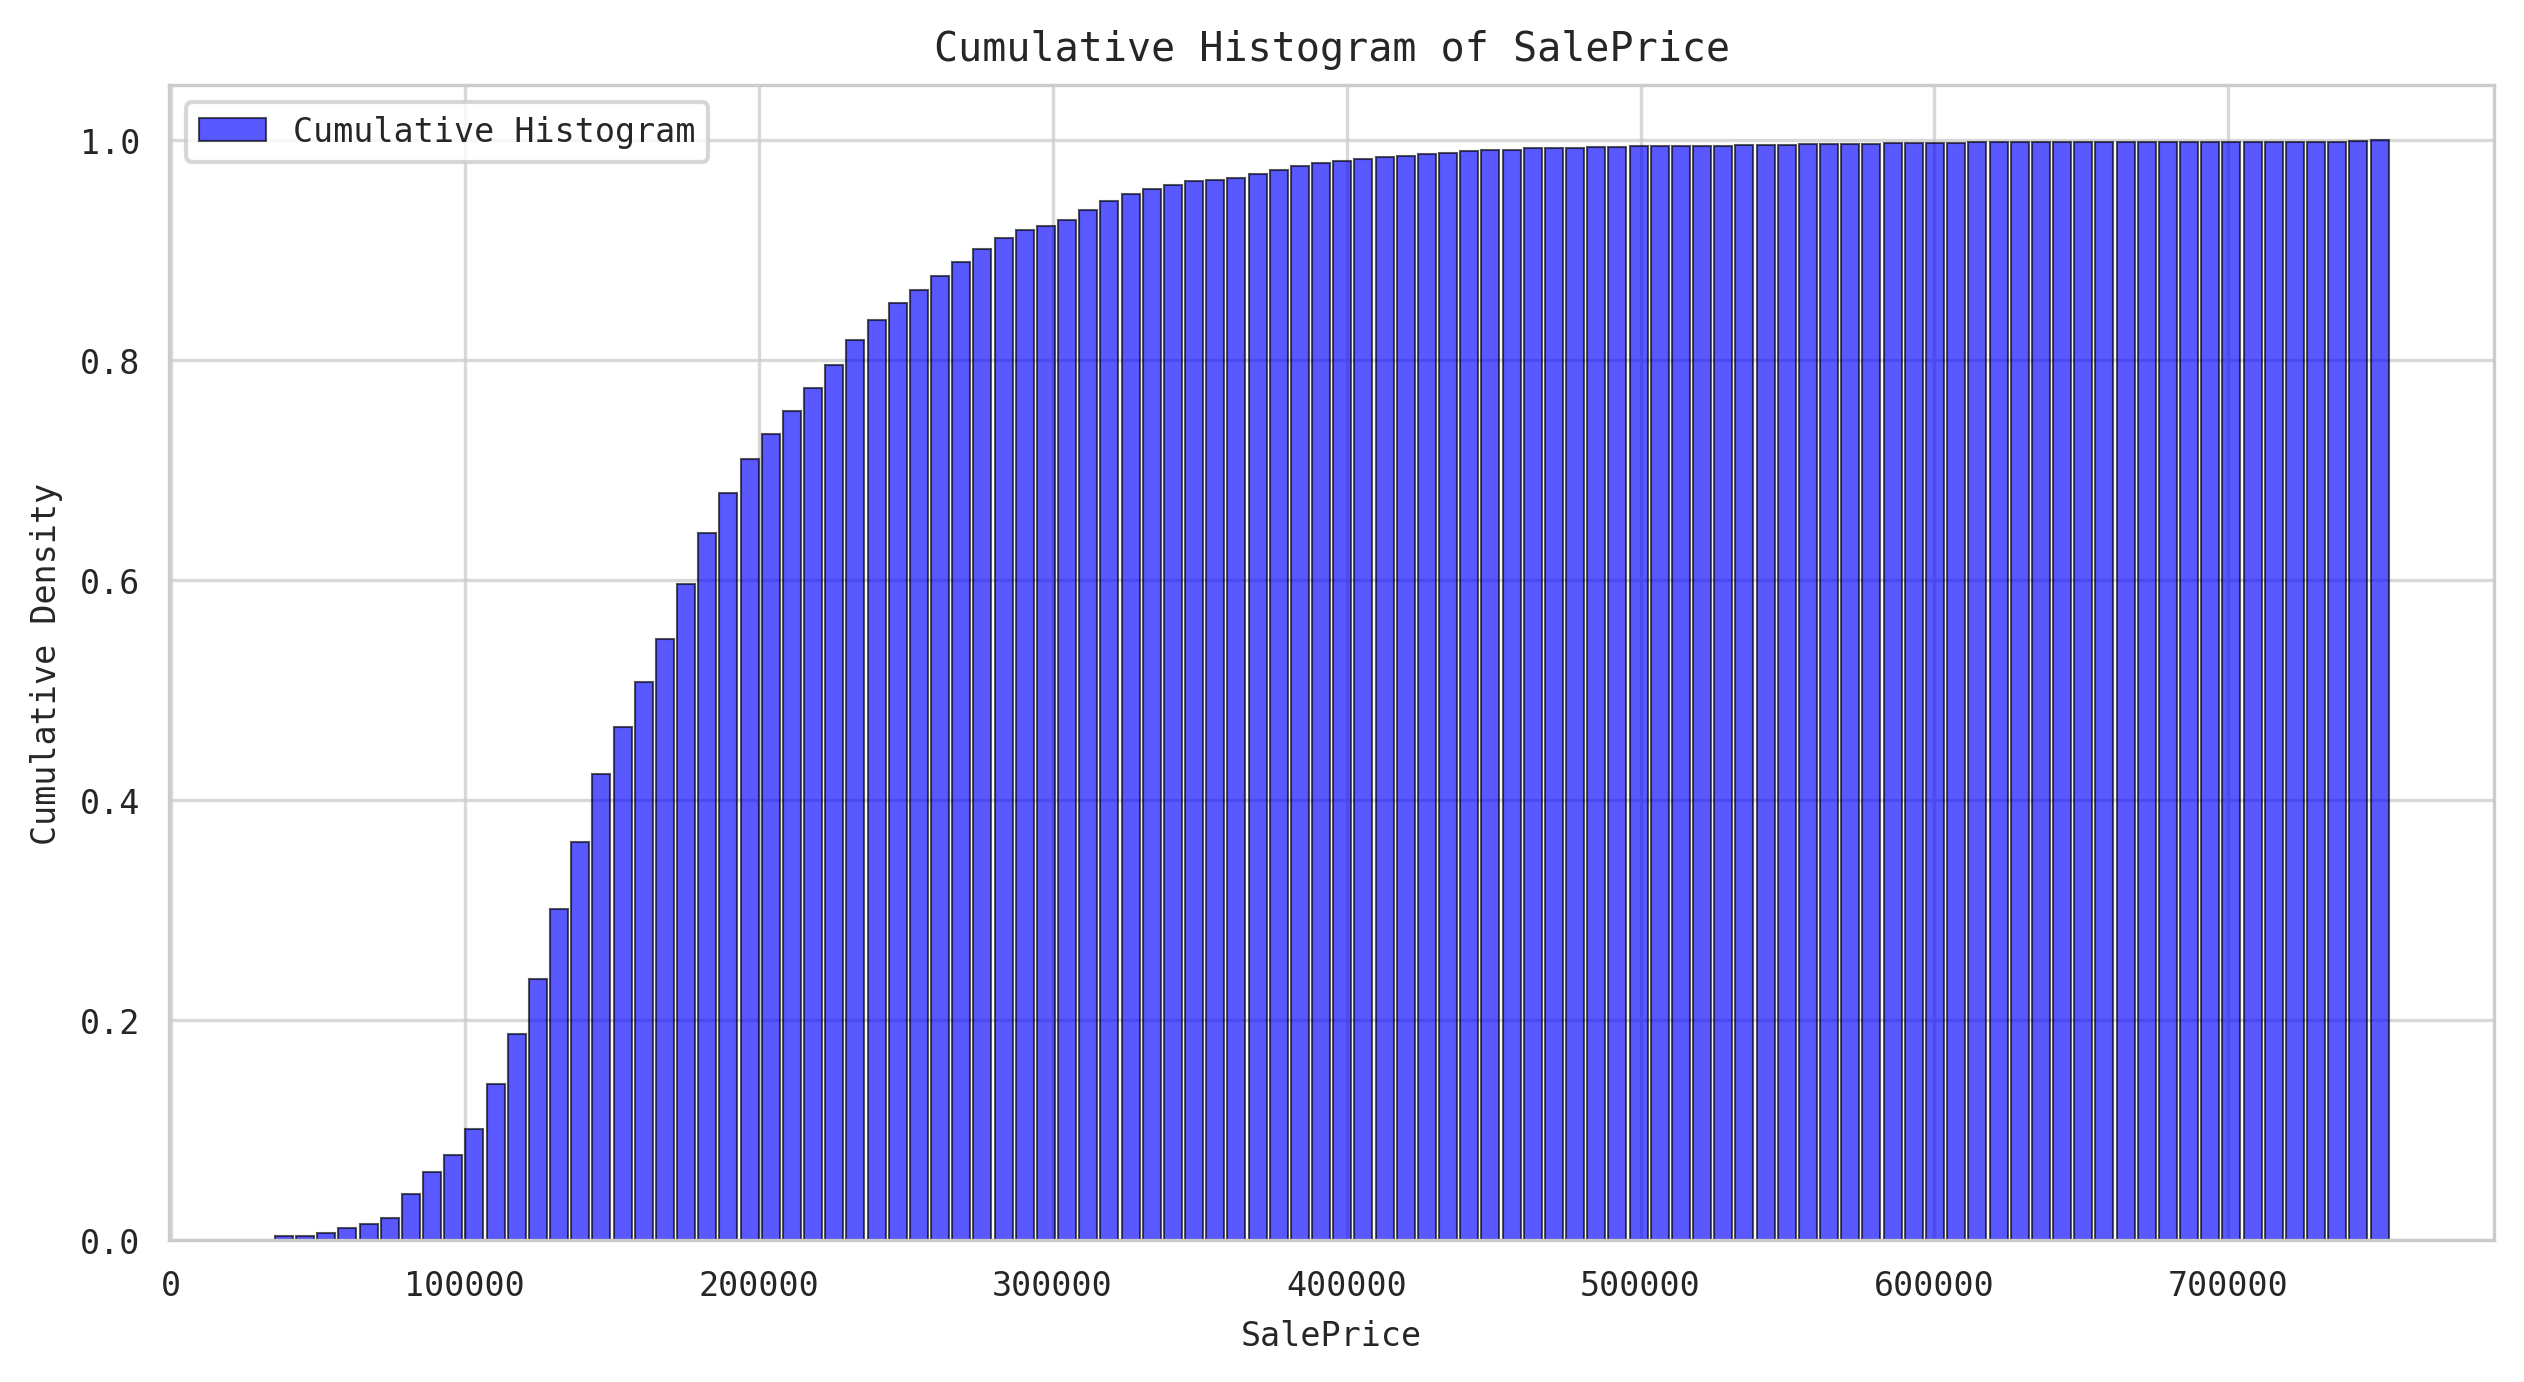

In [13]:
# Afișăm histograma cumulativă a prețurilor de vânzare
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
plt.hist(df['SalePrice'], bins=100, cumulative=True, density=True, alpha=0.65, label='Cumulative Histogram', color='blue', edgecolor='black', linewidth=0.5, rwidth=0.85)
plt.title('Cumulative Histogram of SalePrice')
plt.ylabel('Cumulative Density')
plt.xlabel('SalePrice')
plt.grid(alpha=0.75)
plt.legend()
plt.show()

# Înțelegerea utilizatorilor noștri

Putem observa că `80%` din proprietăți sunt listate la prețuri mai mici de `250 000`, iar până când ajungem la `300 000` acoperim aproape `90%` din toate listările.
- Acest lucru ne oferă o idee bună că aceasta ar putea fi o segmentare pe care dorim să o optimizăm.
- În același timp, poate fi un indicator bun că există anumite caracteristici care ar putea duce la prețuri foarte mari.
- Această creștere exponențială ne-ar putea indica că ar trebui să implementăm mai multe soluții pentru a avea o bună granularitate în toate segmentele de utilizatori.

Pentru a avea soluții cât mai bune, dorim ca datele noastre să se comporte bine din punct de vedere statistic.


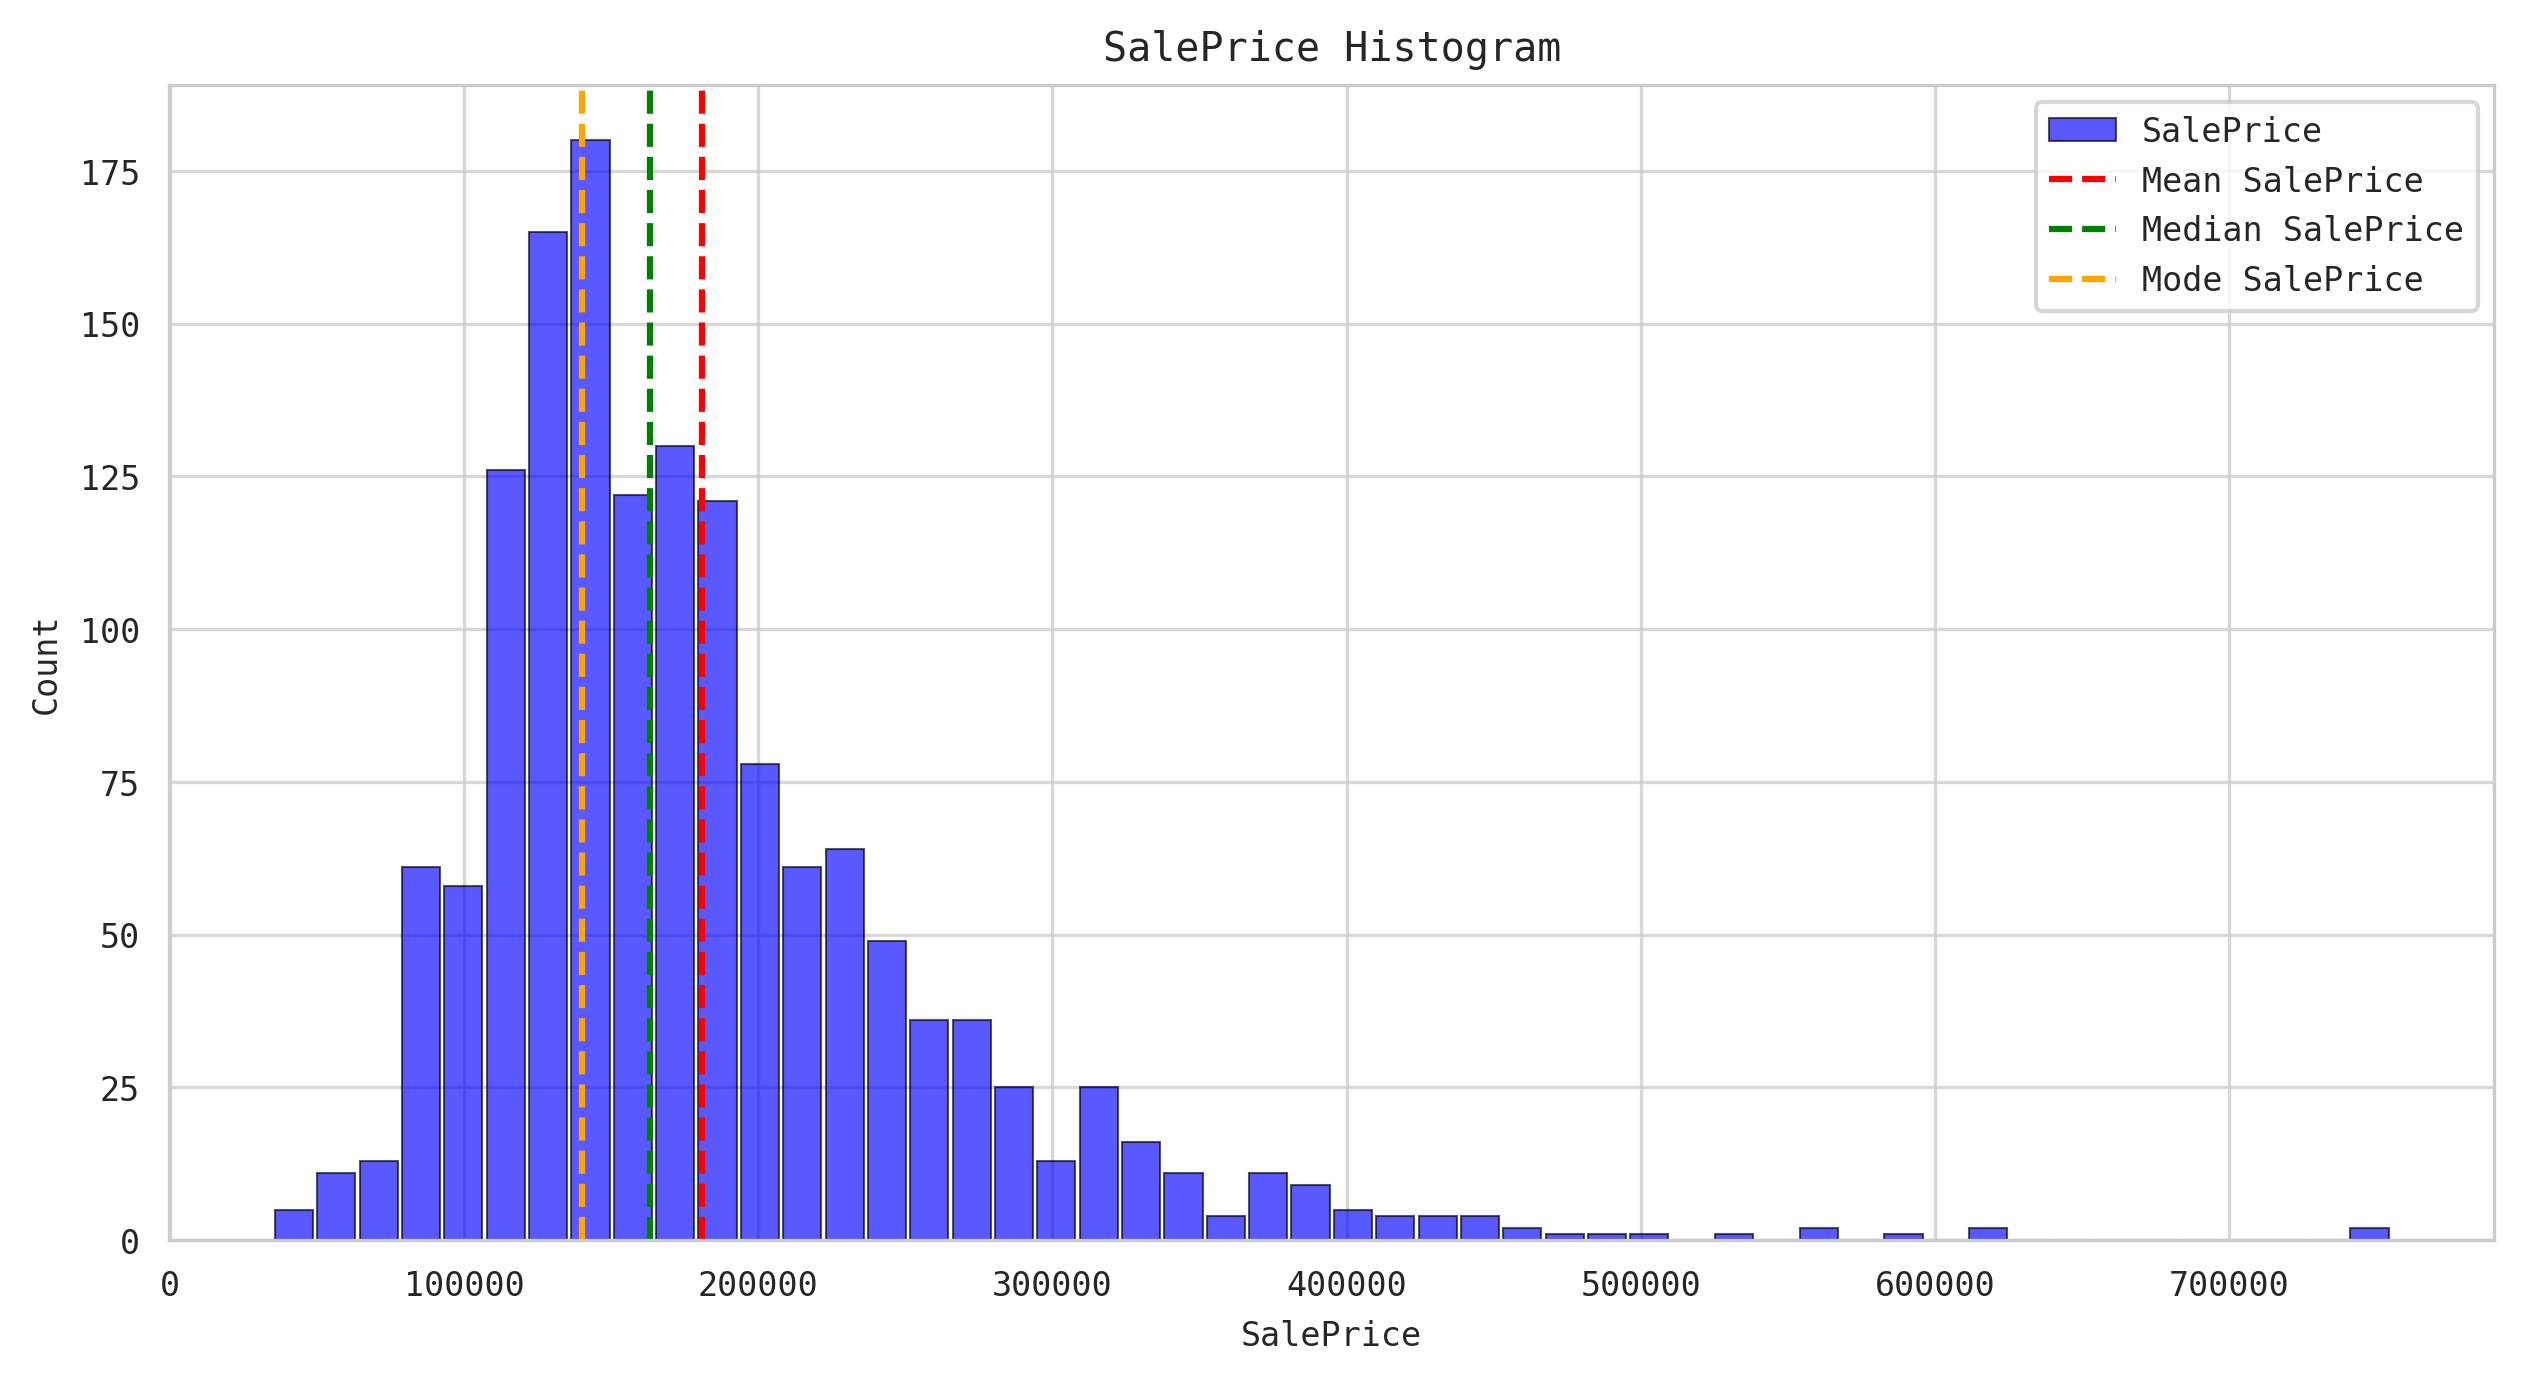

In [14]:
# Afișăm histograma prețurilor de vânzare
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
plt.rcParams['font.family'] = 'monospace'
plt.hist(df['SalePrice'], bins=50, alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='SalePrice', rwidth=0.9)
# Adăugăm o linie verticală la media prețurilor de vânzare
plt.axvline(df['SalePrice'].mean(), color='red', linestyle='--', label='Mean SalePrice')
# Adăugăm încă o linie verticală la mediana prețurilor de vânzare
plt.axvline(df['SalePrice'].median(), color='green', linestyle='--', label='Median SalePrice')
# Adăugăm o a treia linie verticală la valoarea cea mai frecventă a prețurilor de vânzare
plt.axvline(df['SalePrice'].mode()[0], color='orange', linestyle='--', label='Mode SalePrice')
plt.title('SalePrice Histogram')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.grid(alpha=0.75)
plt.legend()


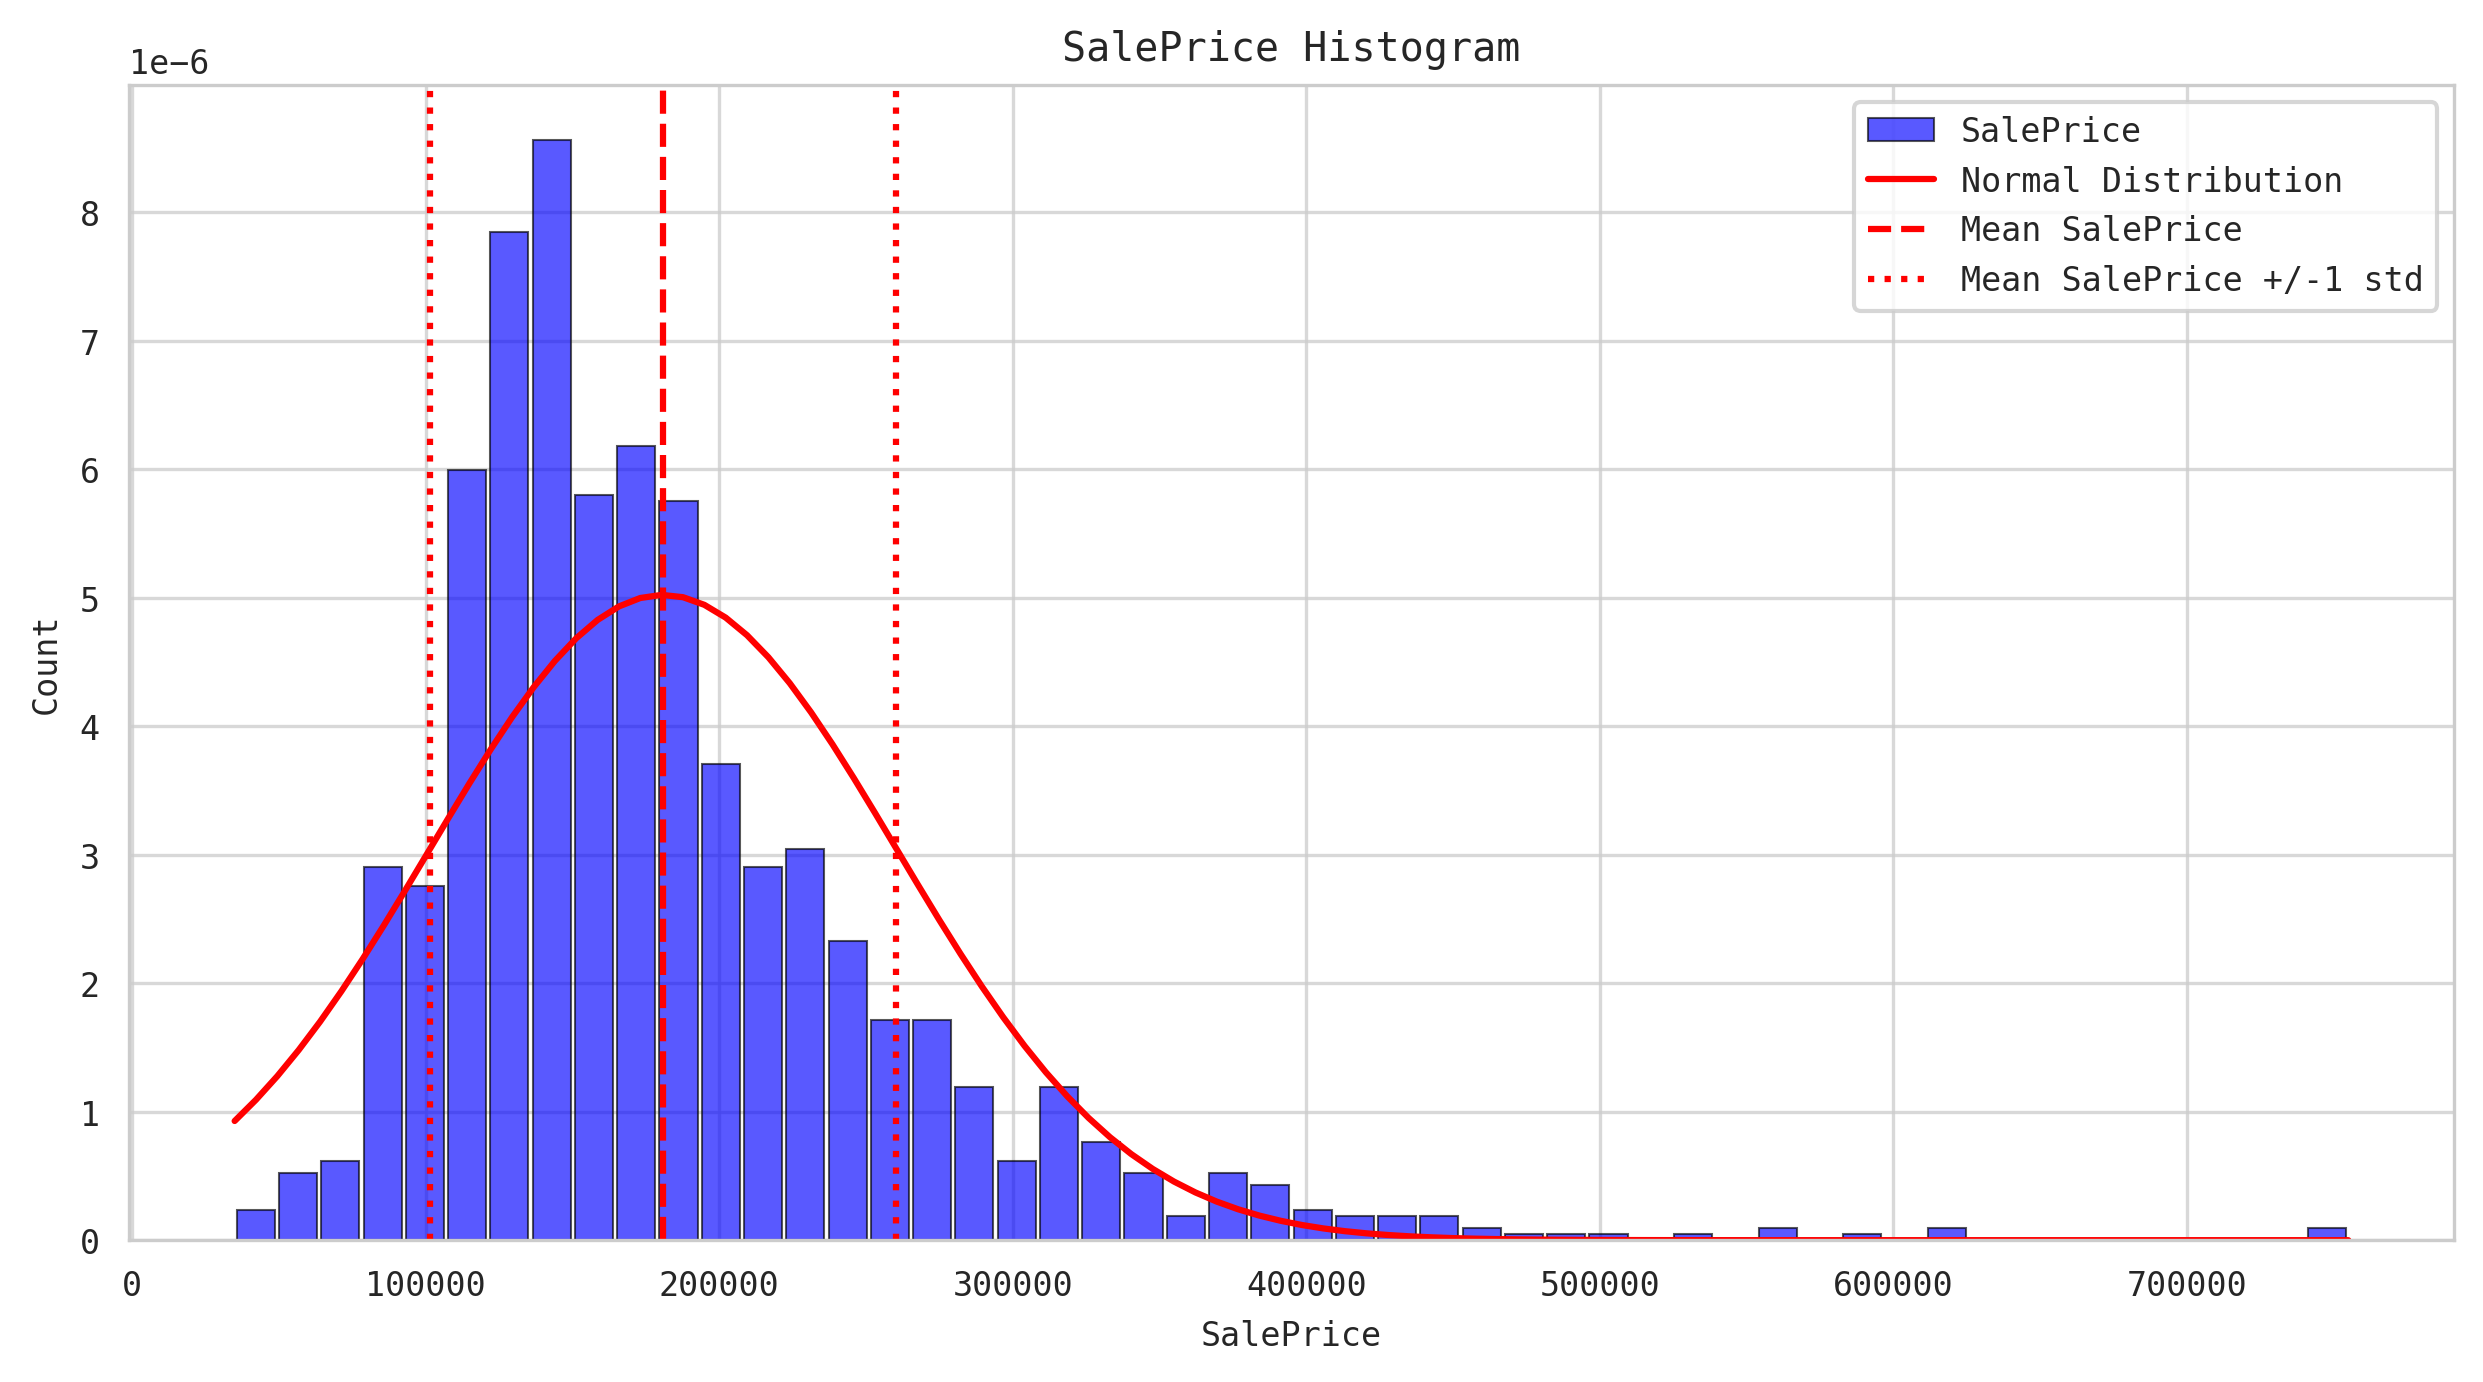

In [15]:
import scipy.stats as stats

# Afișăm pe același grafic histograma prețurilor de vânzare și densitatea normală a acestora
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
plt.rcParams['font.family'] = 'monospace'
plt.hist(df['SalePrice'], bins=50, alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='SalePrice', rwidth=0.9, density=True)
# Afisăm curba densității normale
x = np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 100)
y = stats.norm.pdf(x, df['SalePrice'].mean(), df['SalePrice'].std())
# Renormalizăm curba la histogramă
plt.plot(x, y, color='red', linestyle='-', label='Normal Distribution')
# Adăugăm o linie verticală la media prețurilor de vânzare
plt.axvline(df['SalePrice'].mean(), color='red', linestyle='--', label='Mean SalePrice')
# Adăugăm 2 linii verticale la media prețurilor de vânzare +/- 1 deviație standard
plt.axvline(df['SalePrice'].mean() + df['SalePrice'].std(), color='red', linestyle='dotted', label='Mean SalePrice +/-1 std')
plt.axvline(df['SalePrice'].mean() - df['SalePrice'].std(), color='red', linestyle='dotted')
plt.title('SalePrice Histogram')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.grid(alpha=0.75)
plt.legend()

# Long tails

We notice that the value we would need to infer, has a long tail.
 - Meaning that in one segment we have many values that are considered outliers (very far away from the mean, or from the mean and +/- 1 or 2 standard deviations)
 - These long tails usually require either `cleaning` techniques or `building several models` in order to accurately make predictions for all ranges
# Long tails

Observăm că distribuția de valori a variabilei țintă are o coadă lungă.
 - Aceasta înseamnă că într-un segment avem multe valori considerate outlieri (foarte departe de medie, sau de medie și +/- 1 sau 2 deviații standard).
 - Aceste cozi lungi necesită de obicei una sau mai multe dintre următoarele:
    - `curățarea` datelor
    - `construirea mai multor modele` pentru a face predicții precise pentru fiecare interval.


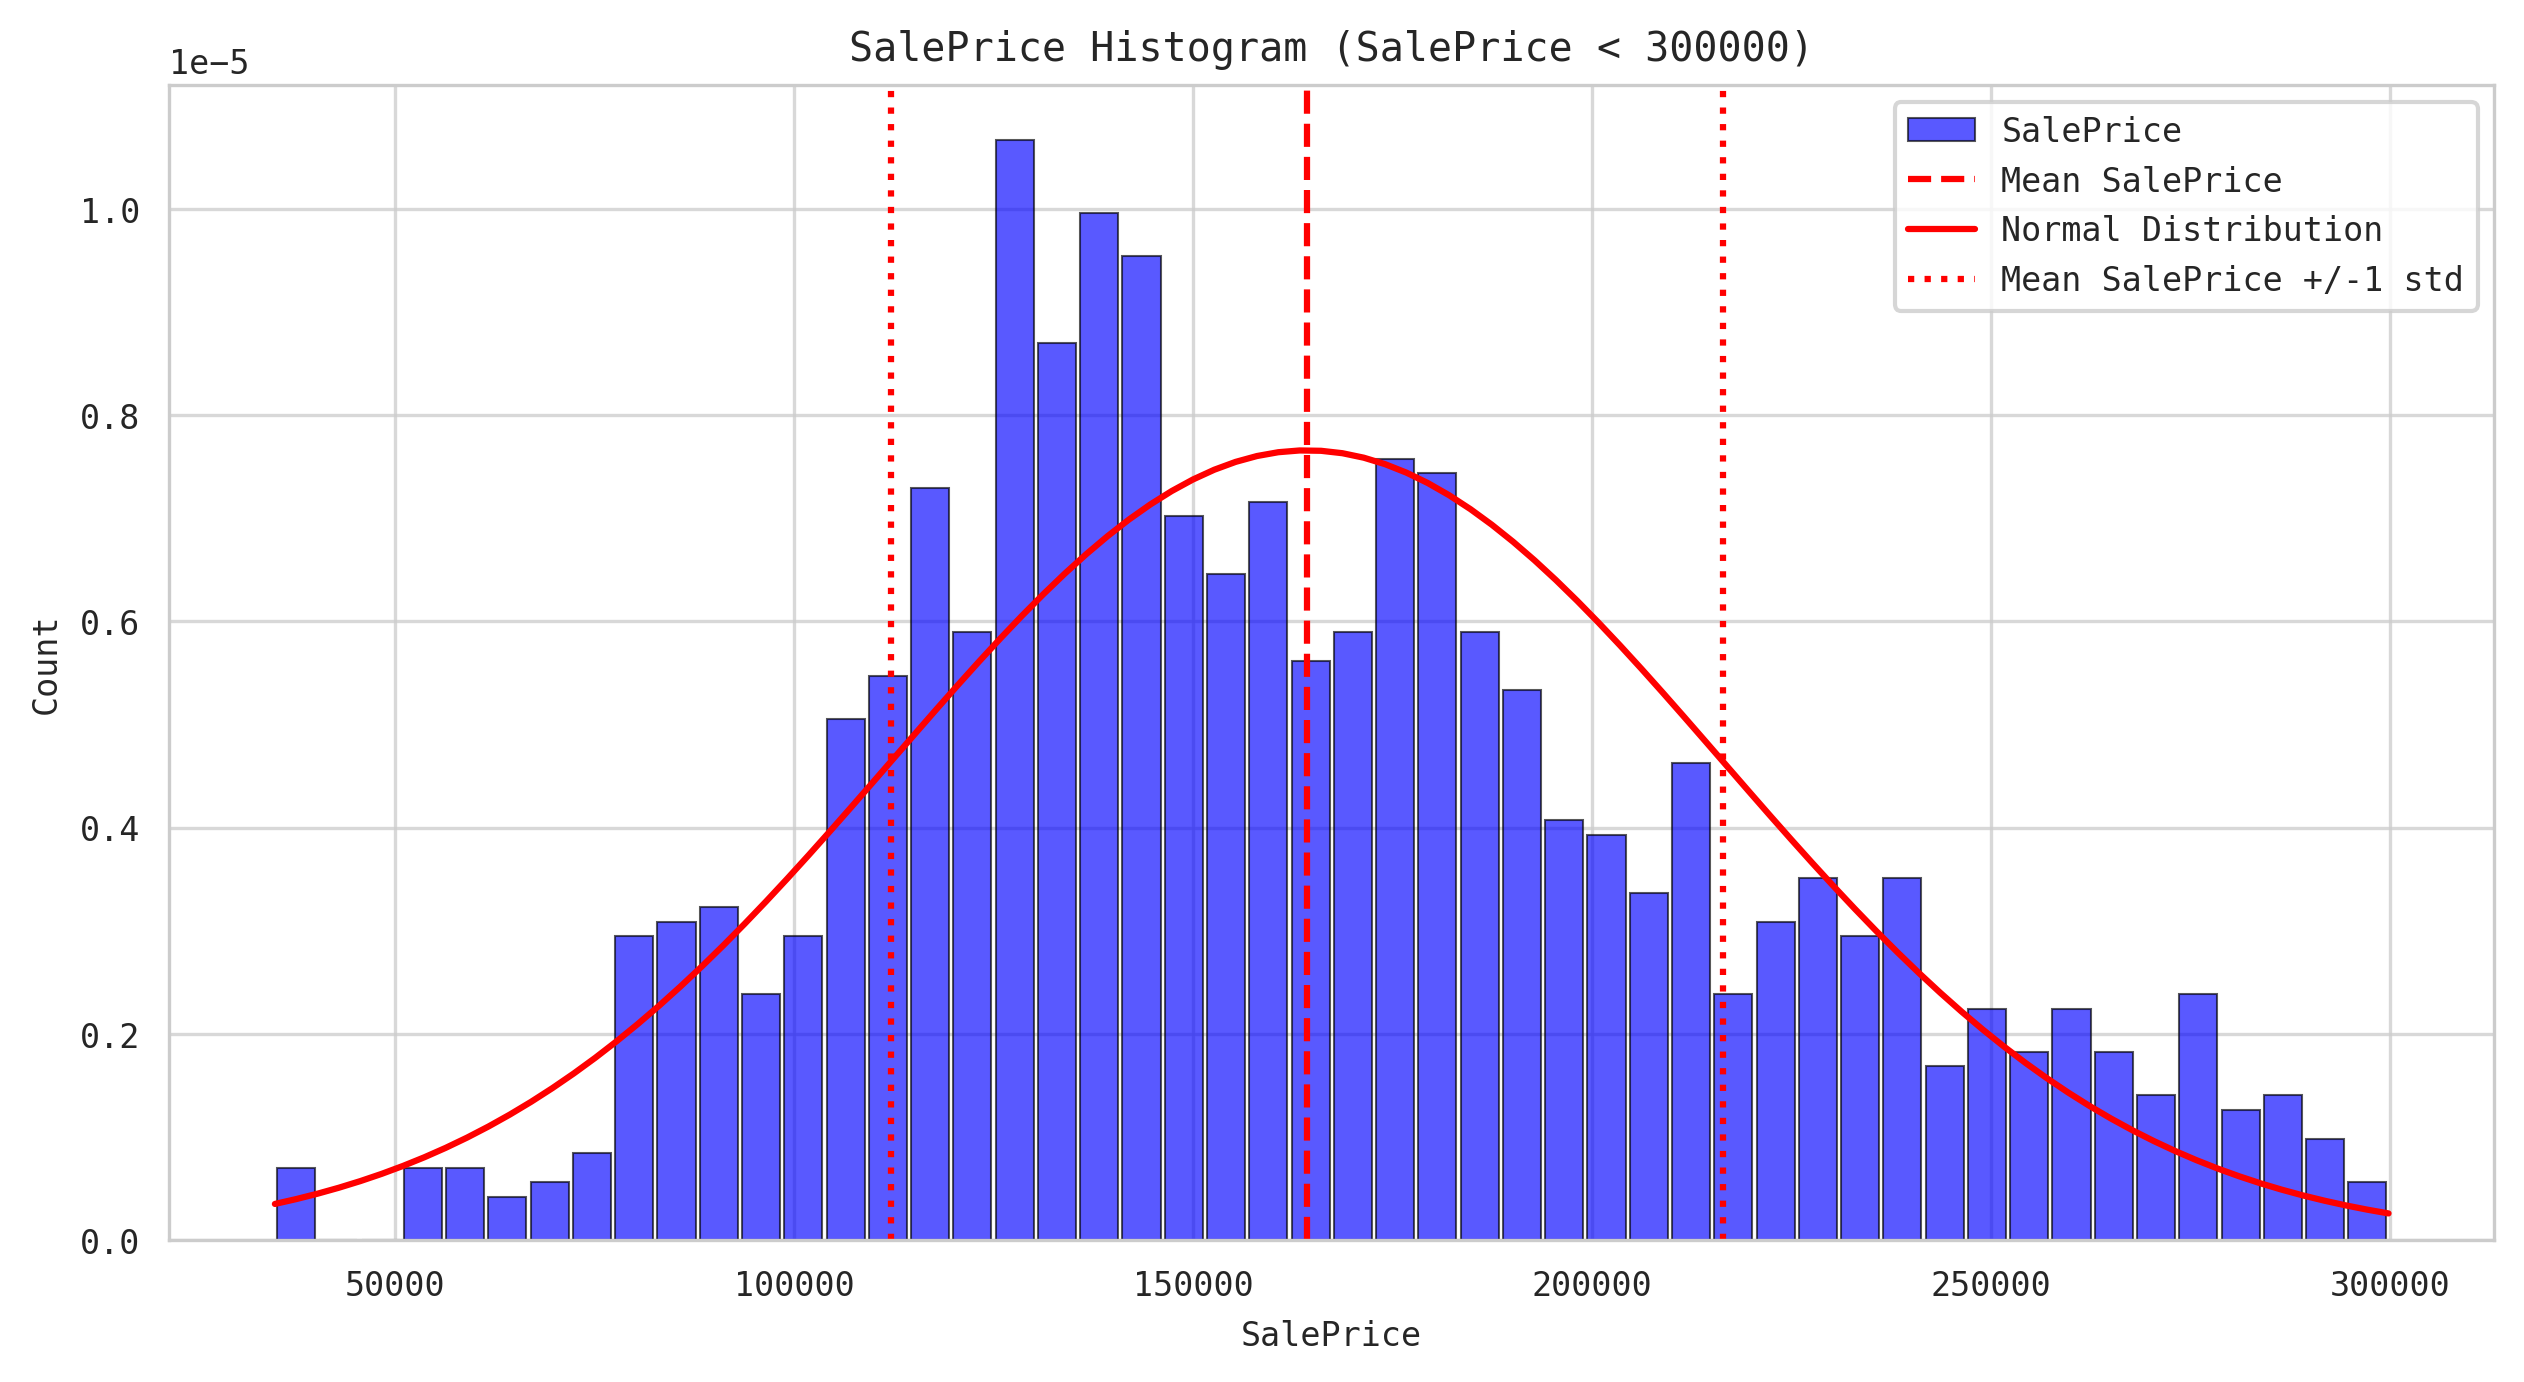

In [16]:
# Extragem doar valorile mai mici de 300000
truncated_df = df[df['SalePrice'] < 300000]

# Facem același grafic ca mai sus, dar doar pentru valorile mai mici de 300000
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
plt.rcParams['font.family'] = 'monospace'
plt.hist(truncated_df['SalePrice'], bins=50, alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='SalePrice', rwidth=0.9, density=True)
plt.axvline(truncated_df['SalePrice'].mean(), color='red', linestyle='--', label='Mean SalePrice')
x = np.linspace(truncated_df['SalePrice'].min(), truncated_df['SalePrice'].max(), 100)
y = stats.norm.pdf(x, truncated_df['SalePrice'].mean(), truncated_df['SalePrice'].std())
plt.plot(x, y, color='red', linestyle='-', label='Normal Distribution')
plt.axvline(truncated_df['SalePrice'].mean() + truncated_df['SalePrice'].std(), color='red', linestyle='dotted', label='Mean SalePrice +/-1 std')
plt.axvline(truncated_df['SalePrice'].mean() - truncated_df['SalePrice'].std(), color='red', linestyle='dotted')
plt.title('SalePrice Histogram (SalePrice < 300000)')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.grid(alpha=0.75)
plt.legend()


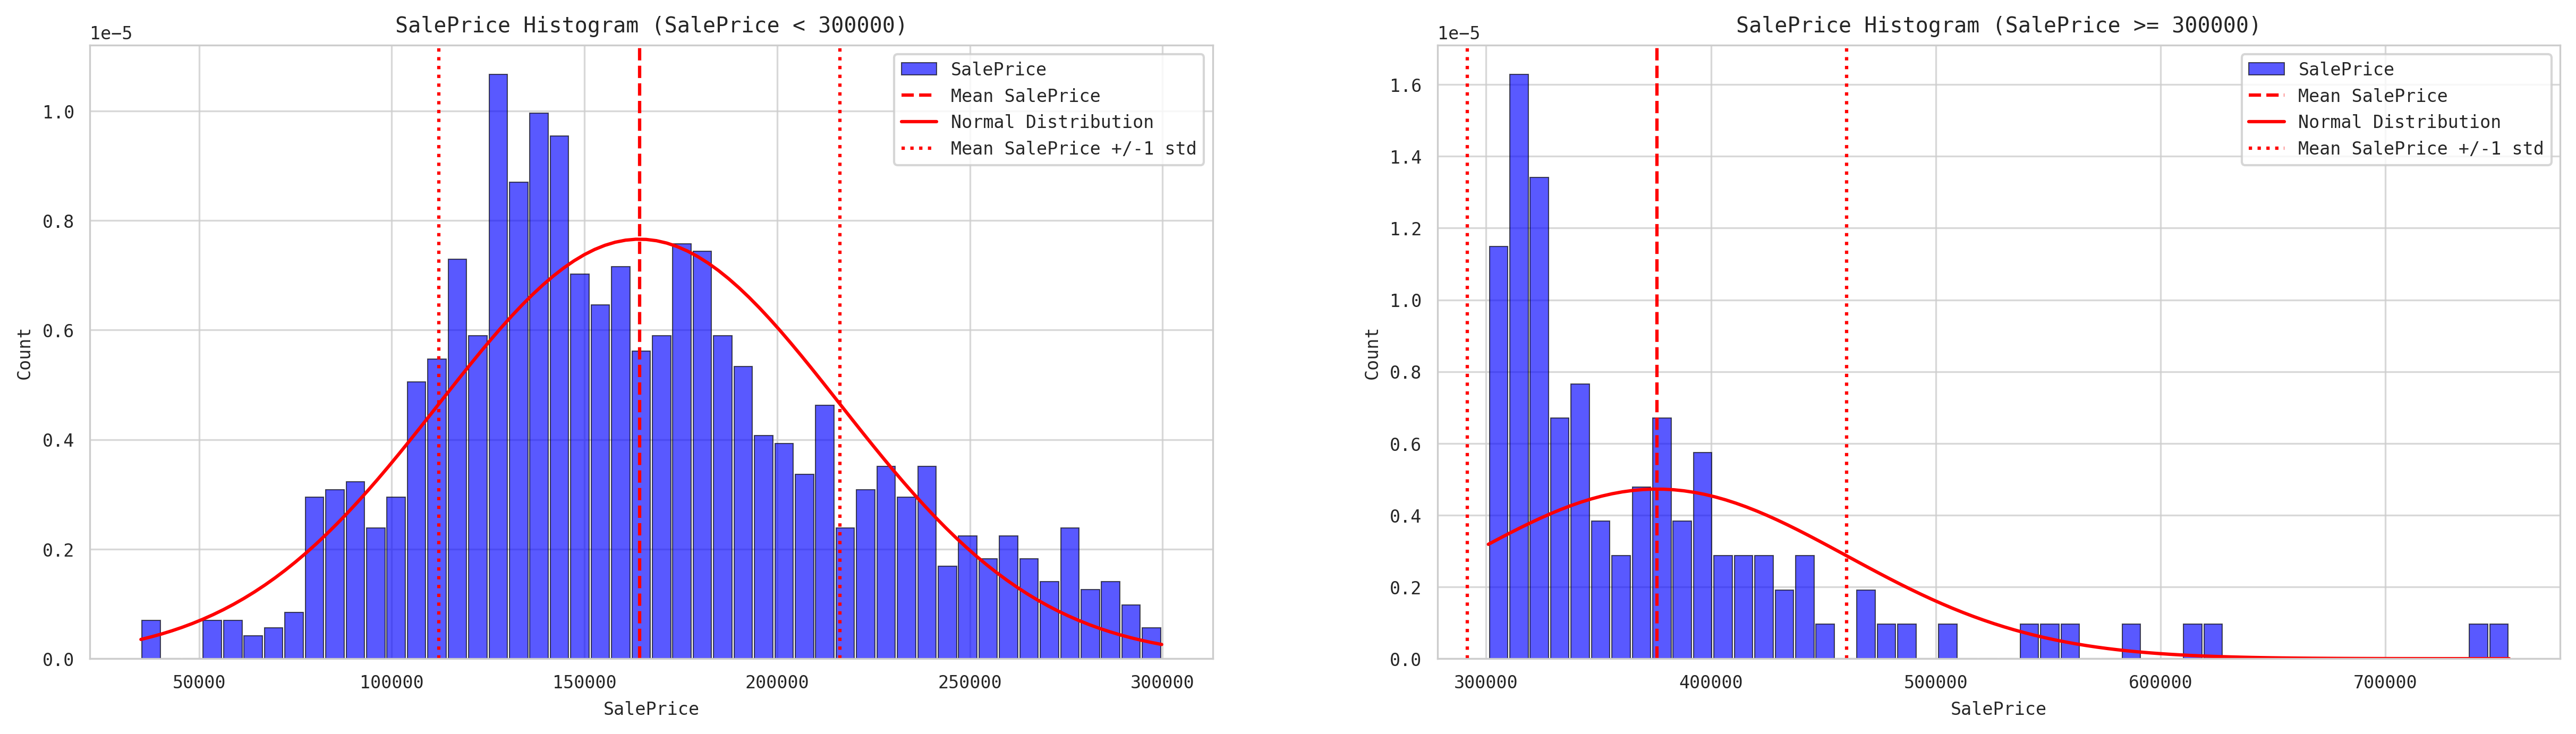

In [17]:
# Afișăm separat histograma prețurilor de vânzare pentru 
# cele mai mari de 300000 și cele mai mici de 300000
fig, ax = plt.subplots(1, 2, figsize=(20, 5), dpi=300)
plt.rcParams['font.family'] = 'monospace'

# Afisăm histograma pentru prețurile mai mici de 300000
low_prices = df[df['SalePrice'] < 300000]
high_prices = df[df['SalePrice'] >= 300000]

ax[0].hist(low_prices['SalePrice'], bins=50, alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='SalePrice', rwidth=0.9, density=True)
ax[0].axvline(low_prices['SalePrice'].mean(), color='red', linestyle='--', label='Mean SalePrice')
x = np.linspace(low_prices['SalePrice'].min(), low_prices['SalePrice'].max(), 100)
y = stats.norm.pdf(x, low_prices['SalePrice'].mean(), low_prices['SalePrice'].std())
ax[0].plot(x, y, color='red', linestyle='-', label='Normal Distribution')
ax[0].axvline(low_prices['SalePrice'].mean() + low_prices['SalePrice'].std(), color='red', linestyle='dotted', label='Mean SalePrice +/-1 std')
ax[0].axvline(low_prices['SalePrice'].mean() - low_prices['SalePrice'].std(), color='red', linestyle='dotted')
ax[0].set_title('SalePrice Histogram (SalePrice < 300000)')
ax[0].set_xlabel('SalePrice')
ax[0].set_ylabel('Count')
ax[0].grid(alpha=0.75)
ax[0].legend()

# Afisăm histograma pentru prețurile mai mari de 300000
ax[1].hist(high_prices['SalePrice'], bins=50, alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='SalePrice', rwidth=0.9, density=True)
ax[1].axvline(high_prices['SalePrice'].mean(), color='red', linestyle='--', label='Mean SalePrice')
x = np.linspace(high_prices['SalePrice'].min(), high_prices['SalePrice'].max(), 100)
y = stats.norm.pdf(x, high_prices['SalePrice'].mean(), high_prices['SalePrice'].std())
ax[1].plot(x, y, color='red', linestyle='-', label='Normal Distribution')
ax[1].axvline(high_prices['SalePrice'].mean() + high_prices['SalePrice'].std(), color='red', linestyle='dotted', label='Mean SalePrice +/-1 std')
ax[1].axvline(high_prices['SalePrice'].mean() - high_prices['SalePrice'].std(), color='red', linestyle='dotted')
ax[1].set_title('SalePrice Histogram (SalePrice >= 300000)')
ax[1].set_xlabel('SalePrice')
ax[1].set_ylabel('Count')
ax[1].grid(alpha=0.75)
ax[1].legend()



# Transformarea datelor

Chiar dacă am reuși să construim o distribuție mai bună prin curățare, tot pare problematică gestionarea valorilor de
 tăiere.
  - Curățarea necesită și `reguli concepute manual` care necesită ajustare sau modificări frecvente.
    - Acest lucru poate cauza erori, întreruperi sau comportamente nedefinite (foarte rău pentru un pipeline 
    automatizat.)
  - Împărțirea în mai multe modele este `costisitoare`.
    - Costuri hardware pentru fiecare instanță individuală.
    - Eforturi de inginerie pentru a construi proxy-uri sau servicii de distribuție peste gateway-ul principal.
    - Efort sporit pentru a automatiza mai multe implementări.

Ideal ar fi să găsim o modalitate de a manipula datele noastre astfel încât să putem satisface cât mai multe dintre constrângeri.


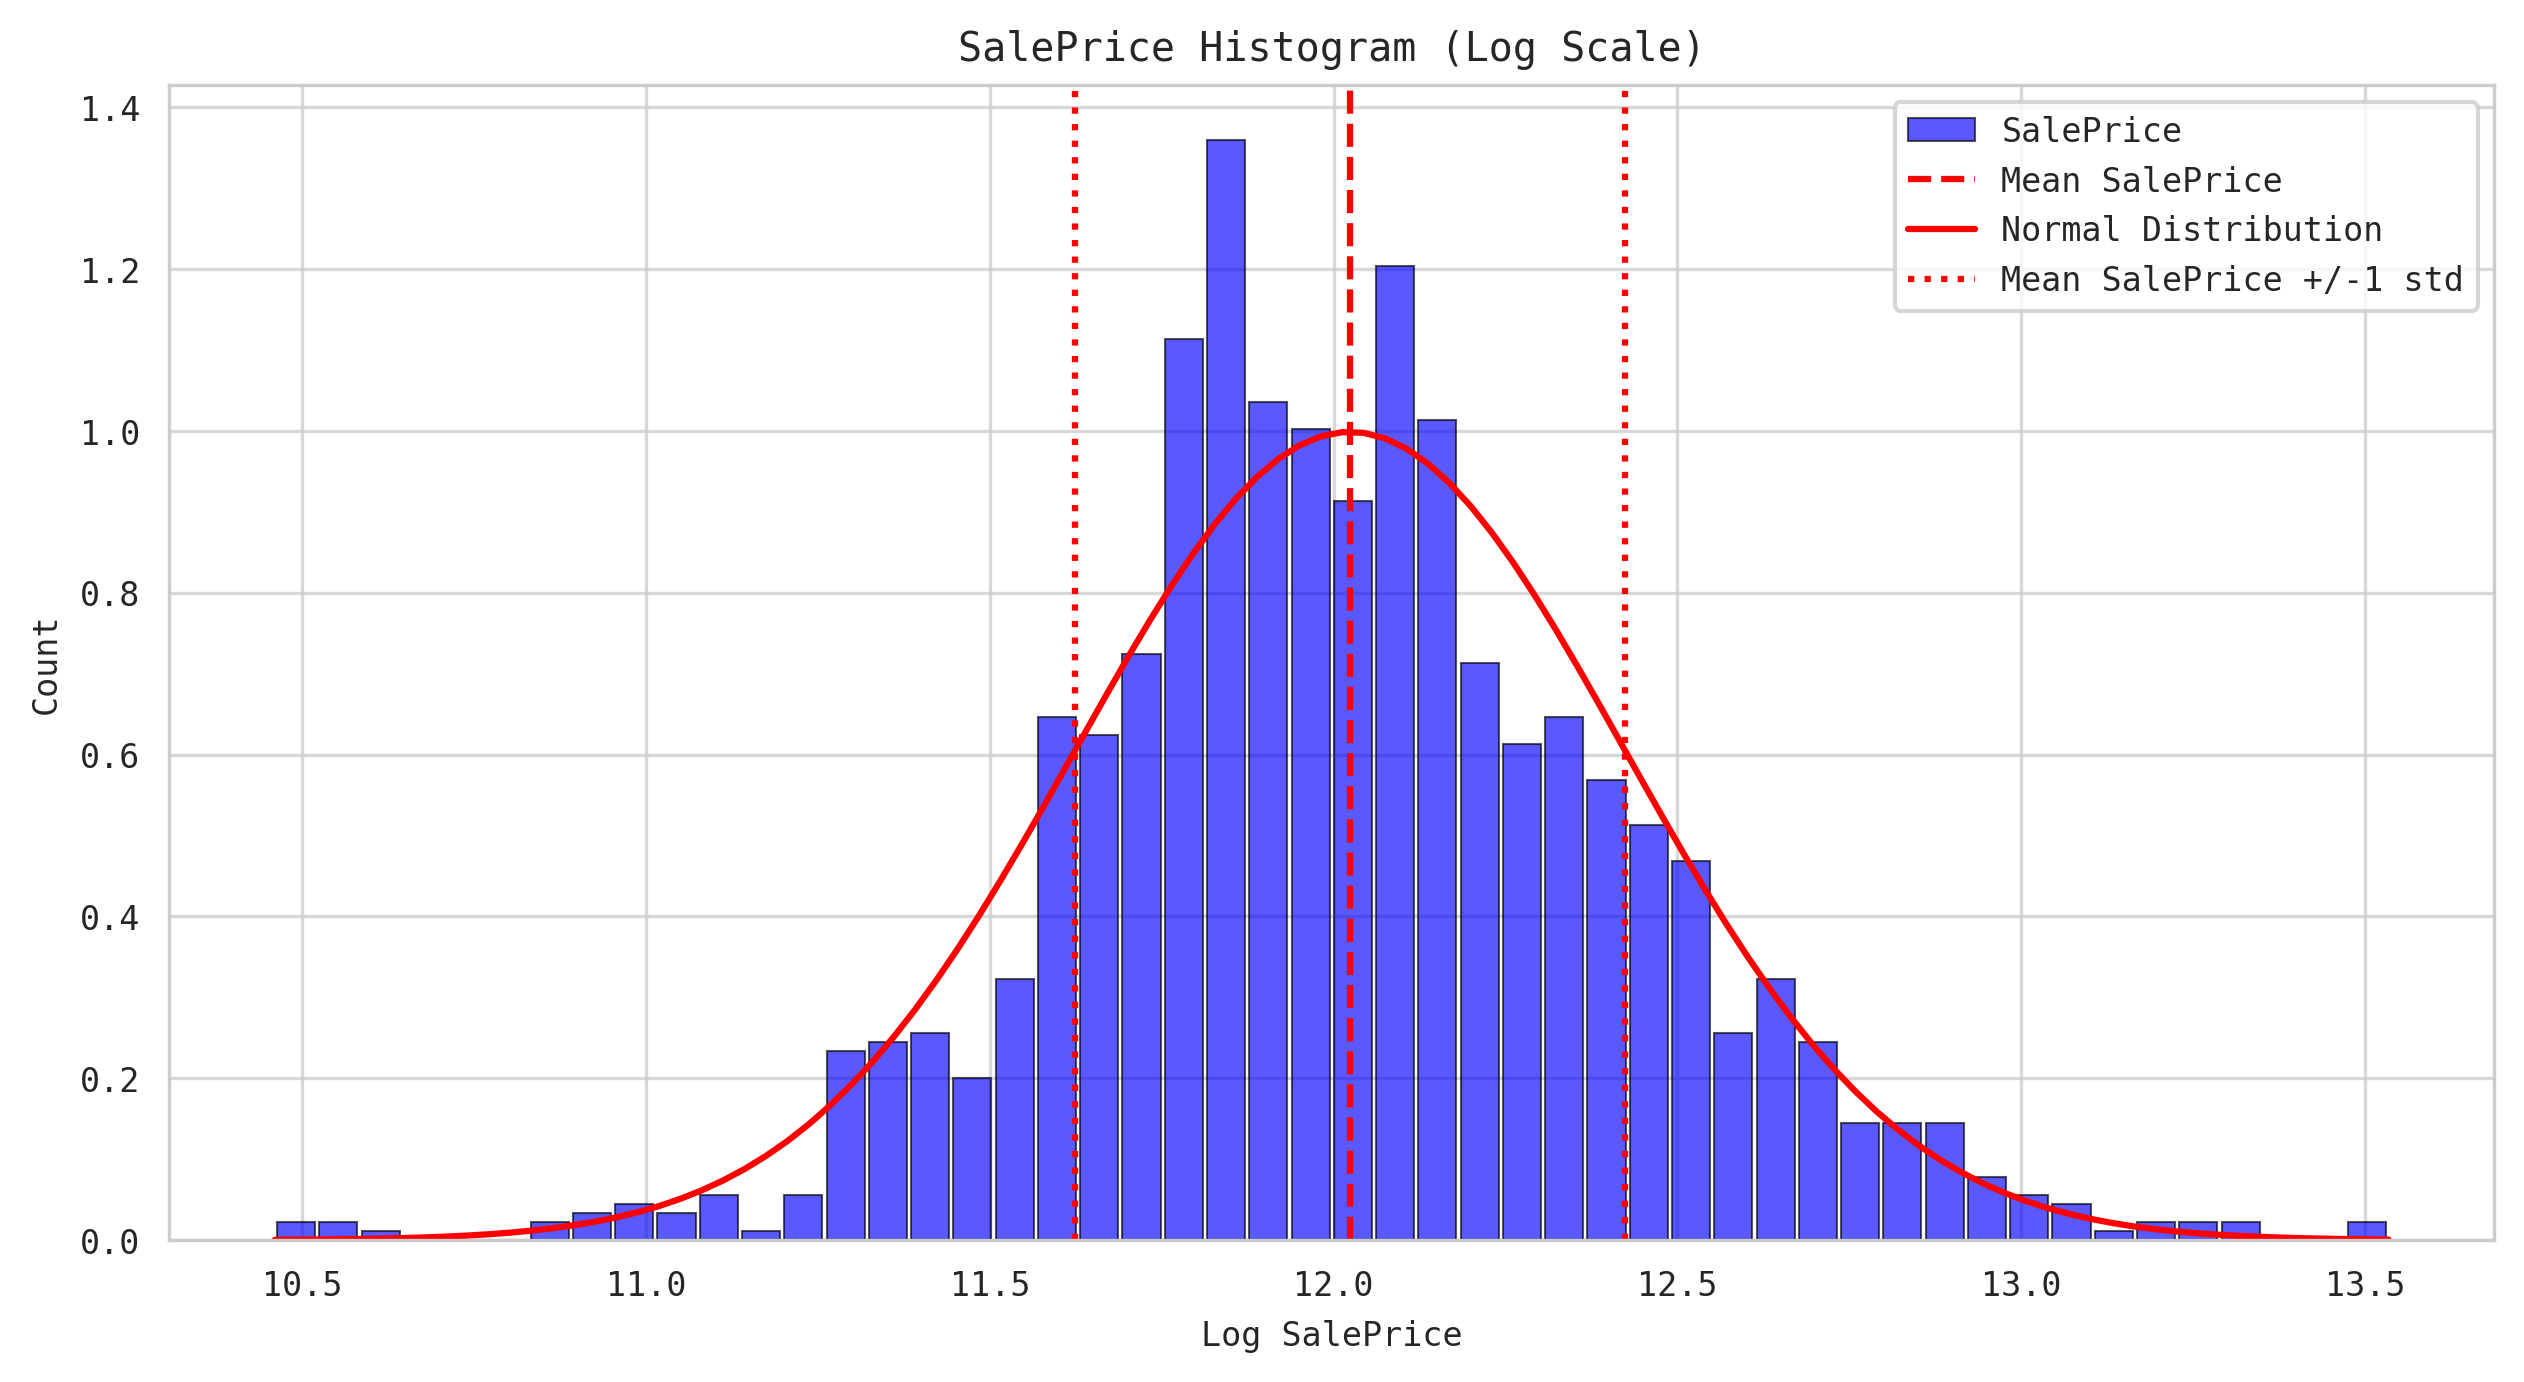

In [18]:
# Încercăm să transformăm datele noastre prin logaritmare
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
log_price_df = df.copy()
log_price_df['SalePrice'] = np.log(log_price_df['SalePrice'])
plt.rcParams['font.family'] = 'monospace'
plt.hist(log_price_df['SalePrice'], bins=50, alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='SalePrice', rwidth=0.9, density=True)
plt.axvline(log_price_df['SalePrice'].mean(), color='red', linestyle='--', label='Mean SalePrice')
x = np.linspace(log_price_df['SalePrice'].min(), log_price_df['SalePrice'].max(), 100)
y = stats.norm.pdf(x, log_price_df['SalePrice'].mean(), log_price_df['SalePrice'].std())
plt.plot(x, y, color='red', linestyle='-', label='Normal Distribution')
plt.axvline(log_price_df['SalePrice'].mean() + log_price_df['SalePrice'].std(), color='red', linestyle='dotted', label='Mean SalePrice +/-1 std')
plt.axvline(log_price_df['SalePrice'].mean() - log_price_df['SalePrice'].std(), color='red', linestyle='dotted')
plt.title('SalePrice Histogram (Log Scale)')
plt.xlabel('Log SalePrice')
plt.ylabel('Count')
plt.grid(alpha=0.75)
plt.legend()



# Sabie cu două tăișuri

Transformarea `logaritmică` a prețului transformă variabila noastră țintă în visul multor statisticieni. `Totuși`:
  - Dacă am prezice `logaritmul prețului`, eroarea crește exponențial
  - Chiar dacă transformările ne ajută să includem toate datele, am putea totuși introduce corelații greșite în algoritmul nostru.

`Întotdeauna testați algoritmul în funcție de cazul său final de utilizare!`

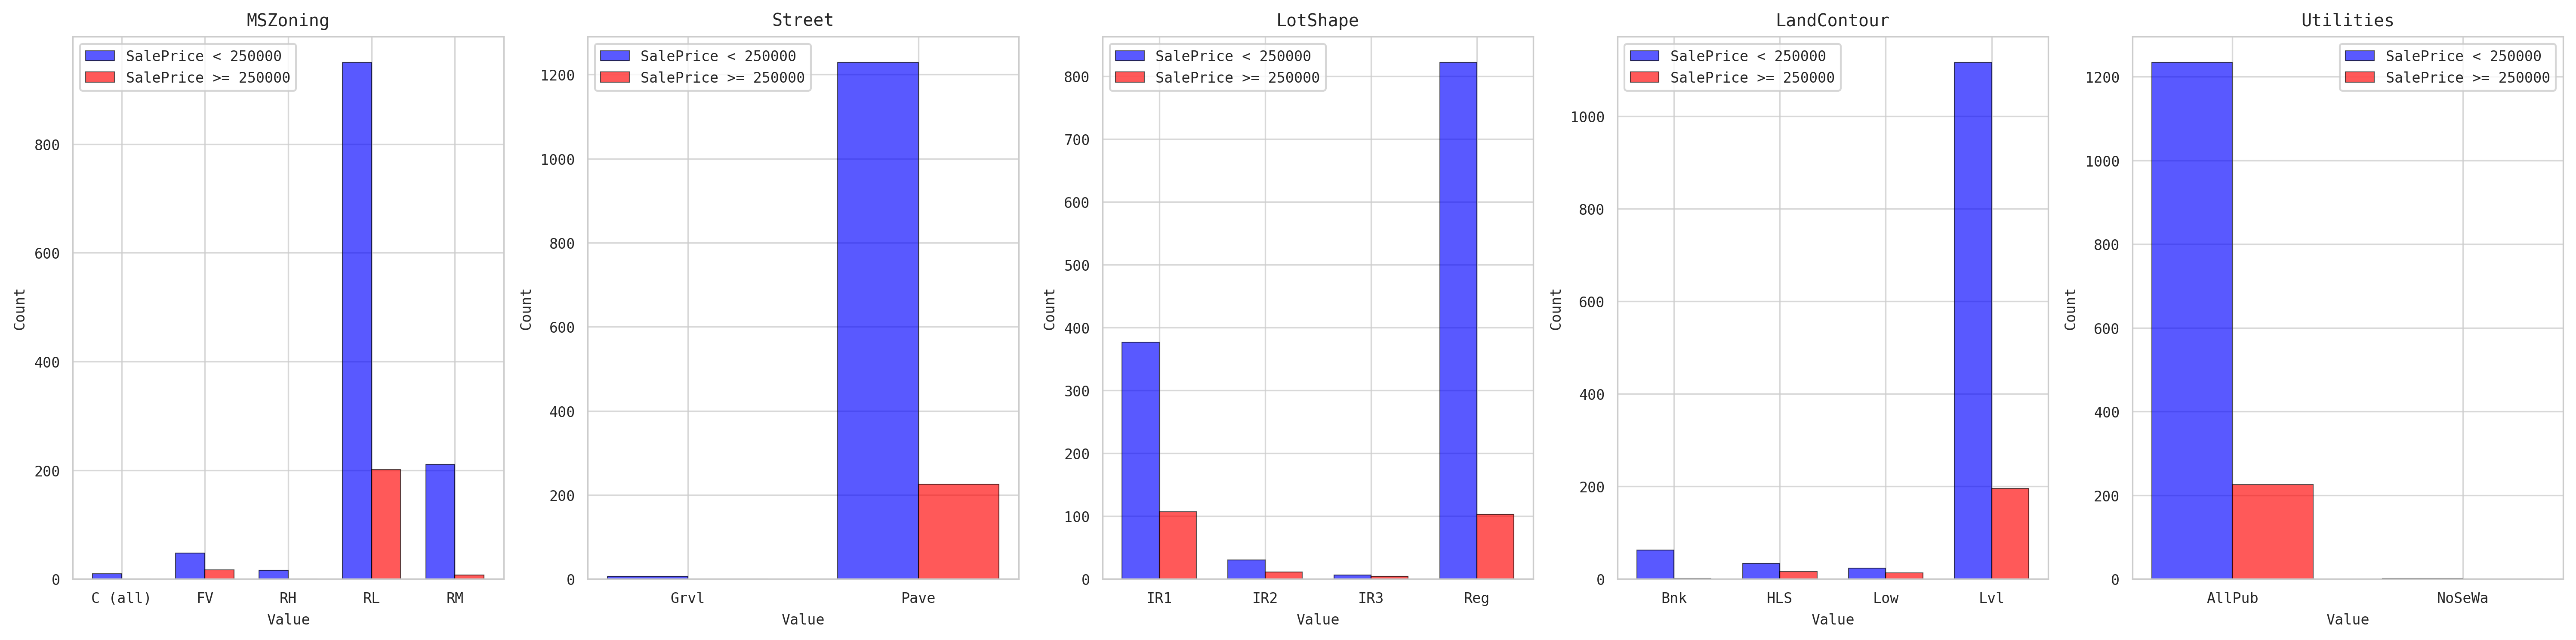

In [19]:
# Dorim să observăm cum se comportă variabilele categorice în funcție de preț.
# Din acest motiv, vom selecta câteva variabile categorice și vom afișa
# distribuția prețurilor per interval pentru fiecare valoare a acestora.
# În acest exemplu vom face împărțirea de prețuri în 2 categorii: < 250000 și >= 250000
plt.rcParams['font.family'] = 'monospace'
low_prices = df[df['SalePrice'] < 250000]
high_prices = df[df['SalePrice'] >= 250000]
categories = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']
fig, ax = plt.subplots(1, len(categories), figsize=(20, 5), dpi=300)
for i, category in enumerate(categories):
    # Afișăm distribuția prețurilor pentru fiecare valoare a variabilei categorice
    low_counts = low_prices[category].value_counts()
    high_counts = high_prices[category].value_counts()
    # Înlocuim valorile lipsă din ambele serii cu 0
    low_counts_dict = low_counts.to_dict()
    high_counts_dict = high_counts.to_dict()
    for key in low_counts_dict.keys():
        if key not in high_counts_dict:
            high_counts_dict[key] = 0
    for key in high_counts_dict.keys():
        if key not in low_counts_dict:
            low_counts_dict[key] = 0
    # Sortăm rezultatele
    low_counts_dict = dict(sorted(low_counts_dict.items()))
    high_counts_dict = dict(sorted(high_counts_dict.items()))
    # Numărăm valorile
    low_counts_values = list(low_counts_dict.values())
    high_counts_values = list(high_counts_dict.values())
    # Afișăm rezultatele
    low_counts_keys = list(low_counts_dict.keys())
    high_counts_keys = list(high_counts_dict.keys())
    ind = np.arange(len(low_counts_keys))
    width = 0.35
    ax[i].bar(ind, low_counts_values, width, alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='SalePrice < 250000')
    ax[i].bar(ind + width, high_counts_values, width, alpha=0.65, color='red', edgecolor='black', linewidth=0.5, label='SalePrice >= 250000')
    ax[i].set_xticks(ind + width / 2)
    ax[i].set_xticklabels(low_counts_keys)
    ax[i].set_title(category)
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Count')
    ax[i].grid(alpha=0.75)
    ax[i].legend()

plt.tight_layout()

# Correlation and Causation

For instance if `LotShape=Reg` it's a pretty strong indicator that the house might be priced lower than `250 000`.
 - An even stronger indicator could be when llooking at `MSZoning=RM` seeing that it severely outweights the `>250 000` category.
 - Although these are good hints, we cannot be sure that some of these variable might be affecting each other.

We should always be on the look-out for how variable interplay with each other, not just with the feature we're trying to build / model.

# Corelație și Cauzalitate

 - De exemplu, `LotShape=Reg` este un indicator destul de puternic că o casă ar putea avea un preț mai mic de `250 000`.
 - Un indicator mai bun ar putea fi `MSZoning=RM`, deoarece acesta are valori preponderent în categoria `>250 000`.
 - Deși aceștia sunt niște indicatori buni, nu putem garanta că unele dintre aceste variabile nu se afectează reciproc.

Ar trebui să fim întotdeauna atenți la modul în care variabilele se influențează între ele, nu doar cu atributul pe 
care încercăm să îl prezicem.


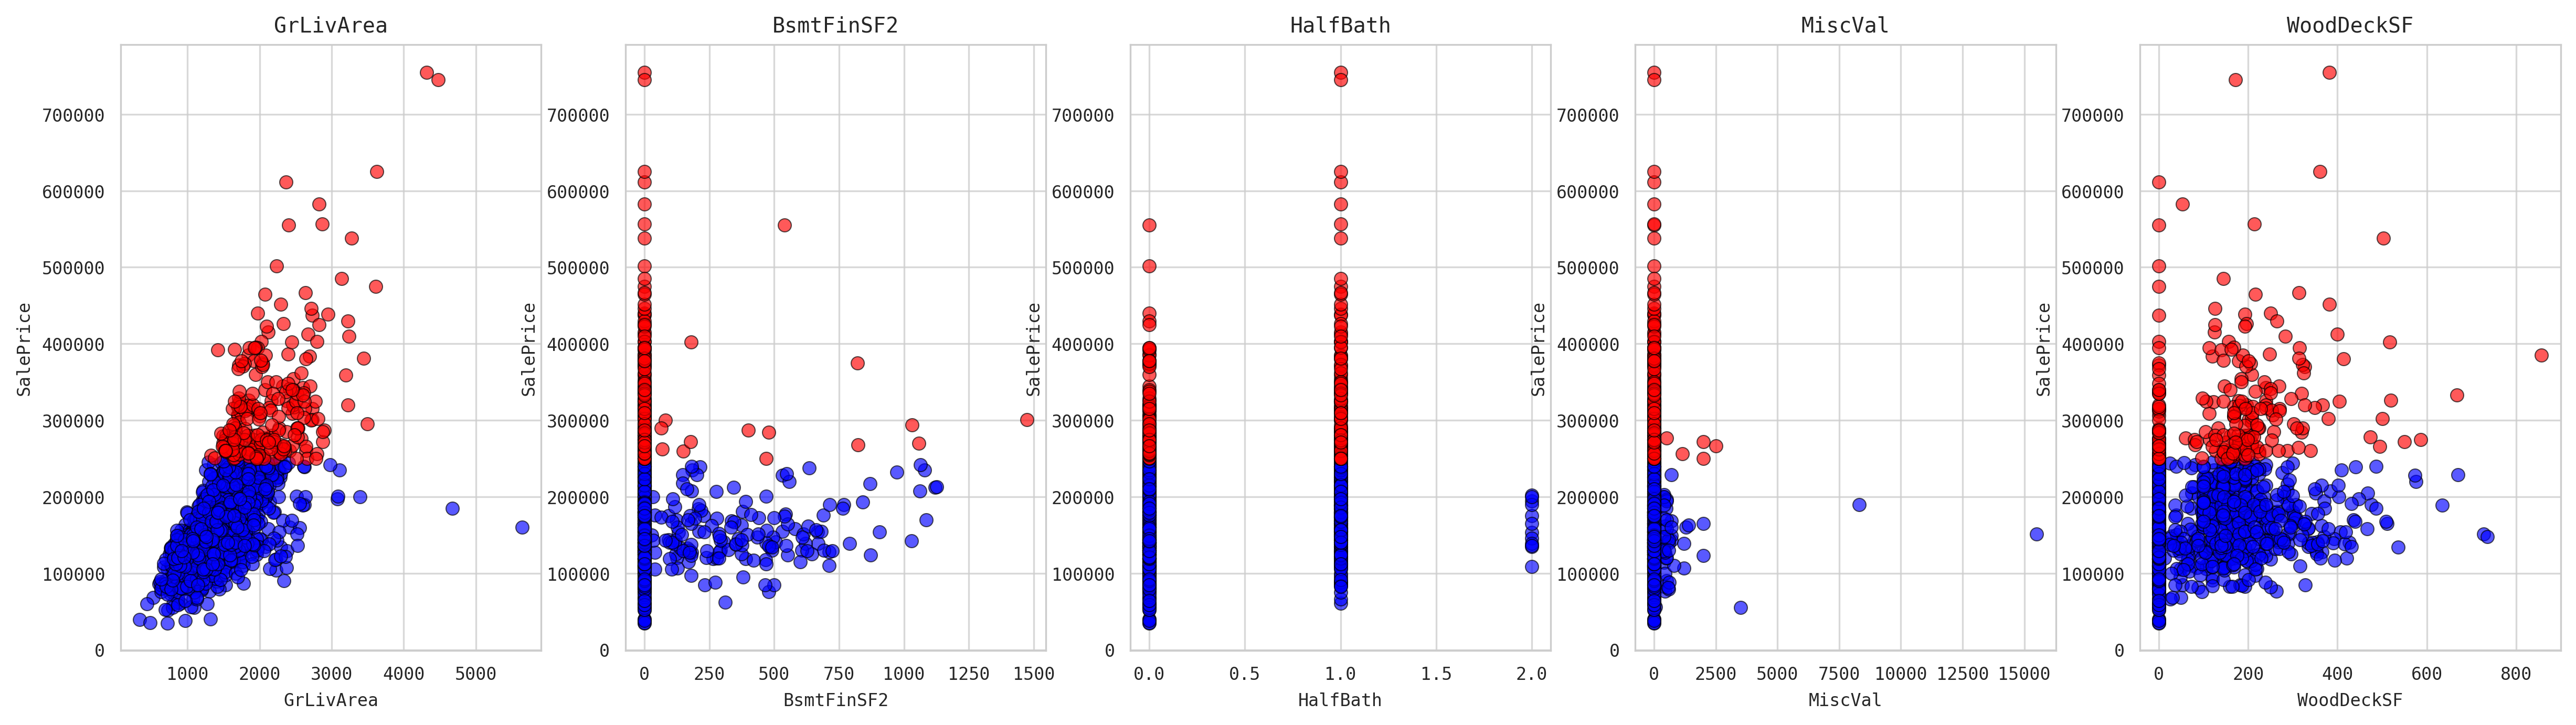

In [20]:
# Selectăm câteva variabile numerice și facem un scatter plot al variabilei vs `SalePrice`
# Dorim să vedem dacă există o relație liniară între variabilă și `SalePrice`
# De asemenea, dorim să vedem dacă există outliers
plt.rcParams['font.family'] = 'monospace'
# plot the histogram for prices < 300000
low_prices = df[df['SalePrice'] < 250000]
high_prices = df[df['SalePrice'] >= 250000]

numerical_variables = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
numerical_variables = np.random.choice(numerical_variables, 5, replace=False)
fig, ax = plt.subplots(1, len(numerical_variables), figsize=(20, 5), dpi=300)
for i, variable in enumerate(numerical_variables):
  ax[i].scatter(low_prices[variable], low_prices['SalePrice'], alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='SalePrice < 250000')
  ax[i].scatter(high_prices[variable], high_prices['SalePrice'], alpha=0.65, color='red', edgecolor='black', linewidth=0.5, label='SalePrice >= 250000')
  ax[i].set_title(variable)
  ax[i].set_xlabel(variable)
  ax[i].set_ylabel('SalePrice')
  ax[i].grid(alpha=0.75)
  

    

/tmp/ipykernel_10914/2794702701.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_prices.loc[variable] = (low_prices[variable] - low_prices[variable].mean()) / low_prices[variable].std()
/tmp/ipykernel_10914/2794702701.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_prices.loc[variable] = (high_prices[variable] - high_prices[variable].mean()) / high_prices[variable].std()
/tmp/ipykernel_10914/2794702701.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

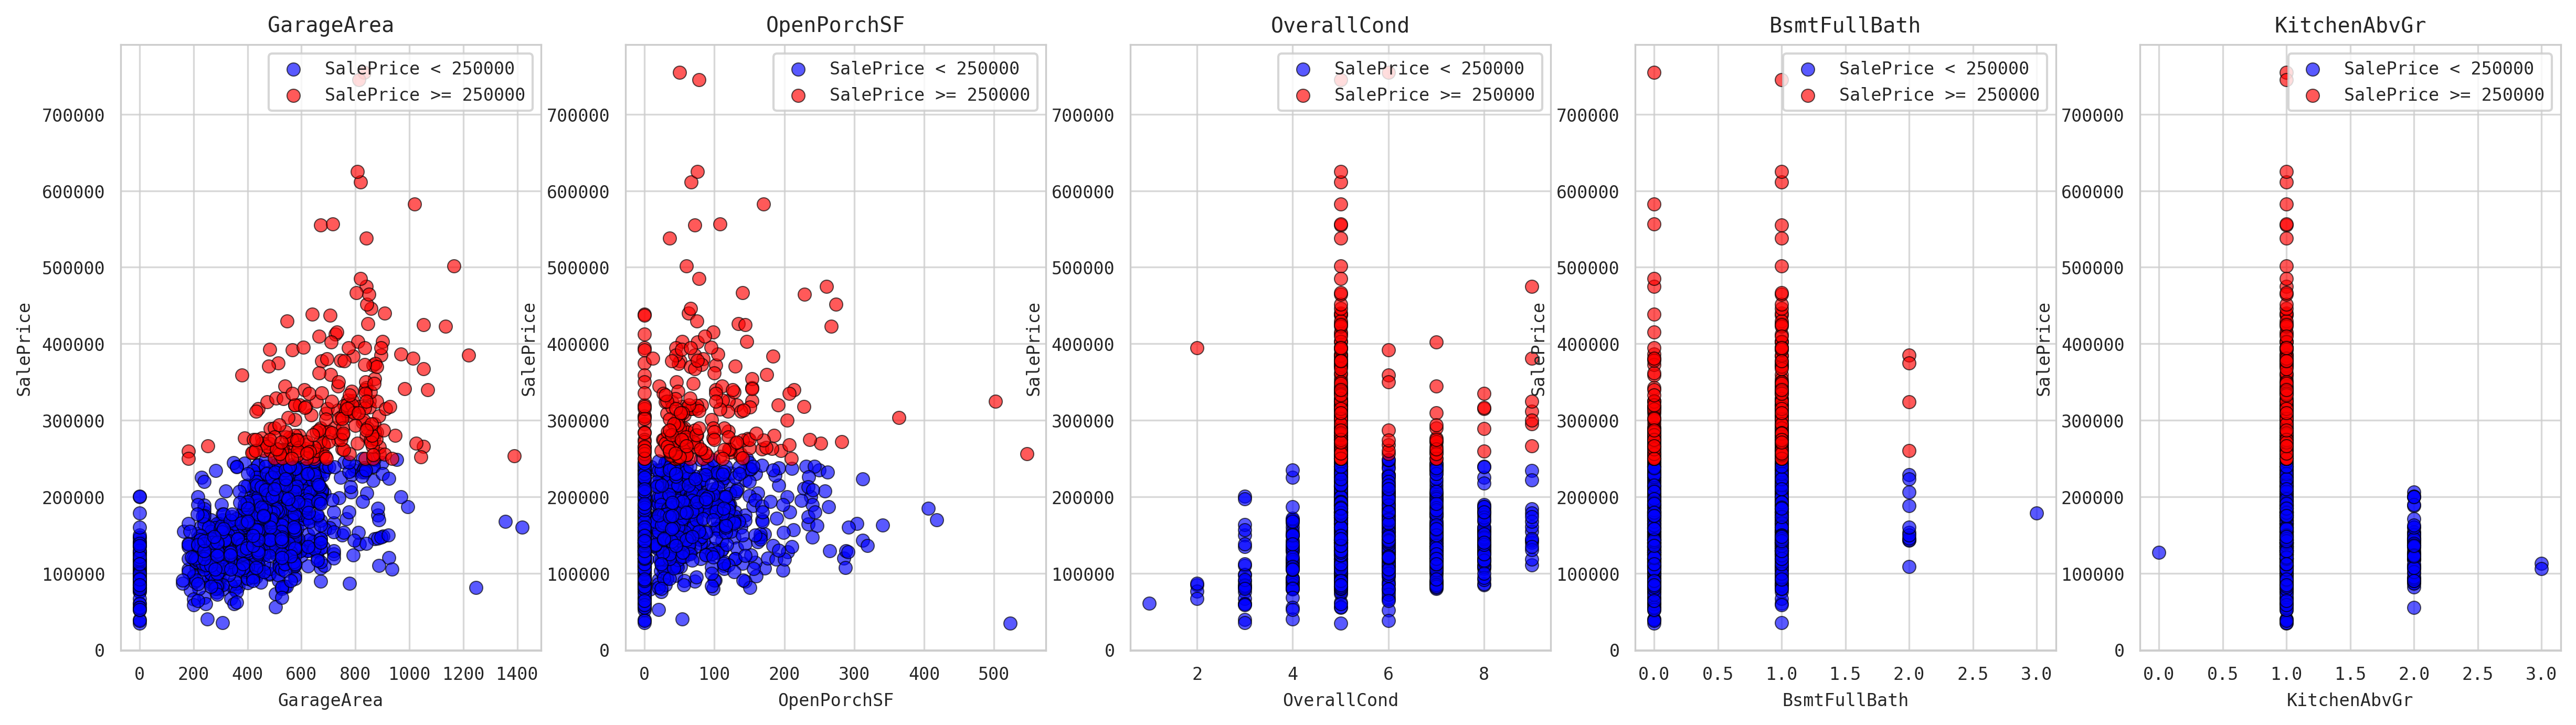

In [21]:
# Facem același lucru, dar cu valorile normalizate
plt.rcParams['font.family'] = 'monospace'
# plot the histogram for prices < 300000
low_prices = df[df['SalePrice'] < 250000]
high_prices = df[df['SalePrice'] >= 250000]

numerical_variables = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
numerical_variables = np.random.choice(numerical_variables, 5, replace=False)
fig, ax = plt.subplots(1, len(numerical_variables), figsize=(20, 5), dpi=300)
for i, variable in enumerate(numerical_variables):
  low_prices.loc[variable] = (low_prices[variable] - low_prices[variable].mean()) / low_prices[variable].std()
  high_prices.loc[variable] = (high_prices[variable] - high_prices[variable].mean()) / high_prices[variable].std()
  ax[i].scatter(low_prices[variable], low_prices['SalePrice'], alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='SalePrice < 250000')
  ax[i].scatter(high_prices[variable], high_prices['SalePrice'], alpha=0.65, color='red', edgecolor='black', linewidth=0.5, label='SalePrice >= 250000')
  ax[i].set_title(variable)
  ax[i].set_xlabel(variable)
  ax[i].set_ylabel('SalePrice')
  ax[i].grid(alpha=0.75)
  ax[i].legend()

# Matricea de corelație

Matricea de corelație este o modalitate excelentă de a vizualiza relațiile dintre variabile.

In [22]:
import seaborn as sns
plt.rcParams['font.family'] = 'monospace'
plt.figure(figsize=(20, 20), dpi=500)

# Reținem doar valorile care au coeficientul de corelație mai mare de 0.4
corr_df = df.corr(numeric_only=True)
corr_df = corr_df - np.diag(np.diag(corr_df))
corr_df = corr_df[(corr_df > 0.4) | (corr_df < -0.4)]
corr_df = corr_df.dropna(axis=0, how='all')
corr_df = corr_df.dropna(axis=1, how='all')
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='black', square=False, cbar=True, cbar_kws={'orientation': 'vertical', 'shrink': 0.8, 'pad': 0.05})
plt.title('Pearson Correlation Matrix', fontsize=20)
plt.tight_layout()


In [23]:
# Afișăm matricea de corelație pentru diferite tipuri de corelație
fig, ax = plt.subplots(1, 3, figsize=(30, 10), dpi=500)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 8
for i, corr_type in enumerate(['pearson', 'kendall', 'spearman']):
  corr_df = df.corr(corr_type, numeric_only=True)
  corr_df = corr_df - np.diag(np.diag(corr_df))
  corr_df = corr_df[(corr_df > 0.4) | (corr_df < -0.4)]
  corr_df = corr_df.dropna(axis=0, how='all')
  corr_df = corr_df.dropna(axis=1, how='all')
  sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='black', square=False, cbar=True, cbar_kws={'orientation': 'vertical', 'shrink': 0.8, 'pad': 0.05}, ax=ax[i], mask=corr_df.isnull())
  ax[i].set_title(corr_type, fontsize=20)
plt.tight_layout()



# Post-Variable selection

După ce am selectat câteva variabile corelate, dorim să verificăm calitatea lor individuală - în special, valorile lipsă sau outlierii.

In [24]:
# Păstrăm doar cele mai corelate 20 de variabile cu `SalePrice`
num_vars = 20

train_df = pd.read_csv('data/house_prices/train.csv')
corr_df = train_df.corr(numeric_only=True)
corr_df = corr_df['SalePrice'].sort_values(ascending=False).head(num_vars)
columns = corr_df.index
filtered_df = train_df[columns]

# Afișăm valorile lipsă pentru fiecare atribut
total_null = filtered_df.isnull().sum().sort_values(ascending=False)
percent_null = filtered_df.isnull().sum() / filtered_df.isnull().count() * 100
percent_null = percent_null.sort_values(ascending=False)
null_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
null_data.head(10)

Total    Percent
LotFrontage    259  17.739726
GarageYrBlt     81   5.547945
MasVnrArea       8   0.547945
SalePrice        0   0.000000
OverallQual      0   0.000000
OpenPorchSF      0   0.000000
2ndFlrSF         0   0.000000
WoodDeckSF       0   0.000000
BsmtFinSF1       0   0.000000
Fireplaces       0   0.000000

In [25]:
filtered_df.describe()

SalePrice  OverallQual    GrLivArea   GarageCars   GarageArea  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   180921.195890     6.099315  1515.463699     1.767123   472.980137   
std     79442.502883     1.382997   525.480383     0.747315   213.804841   
min     34900.000000     1.000000   334.000000     0.000000     0.000000   
25%    129975.000000     5.000000  1129.500000     1.000000   334.500000   
50%    163000.000000     6.000000  1464.000000     2.000000   480.000000   
75%    214000.000000     7.000000  1776.750000     2.000000   576.000000   
max    755000.000000    10.000000  5642.000000     4.000000  1418.000000   

       TotalBsmtSF     1stFlrSF     FullBath  TotRmsAbvGrd    YearBuilt  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712     1.565068      6.517808  1971.267808   
std     438.705324   386.587738     0.550916      1.625393    30.202904   
min       0.000000   334.000000     0.000000      2.000000  1872.000000   
25%     795.750000   882.000000     1.000000      5.000000  1954.000000   
50%     991.500000  1087.000000     2.000000      6.000000  1973.000000   
75%    1298.250000  1391.250000     2.000000      7.000000  2000.000000   
max    6110.000000  4692.000000     3.000000     14.000000  2010.000000   

       YearRemodAdd  GarageYrBlt   MasVnrArea   Fireplaces   BsmtFinSF1  \
count   1460.000000  1379.000000  1452.000000  1460.000000  1460.000000   
mean    1984.865753  1978.506164   103.685262     0.613014   443.639726   
std       20.645407    24.689725   181.066207     0.644666   456.098091   
min     1950.000000  1900.000000     0.000000     0.000000     0.000000   
25%     1967.000000  1961.000000     0.000000     0.000000     0.000000   
50%     1994.000000  1980.000000     0.000000     1.000000   383.500000   
75%     2004.000000  2002.000000   166.000000     1.000000   712.250000   
max     2010.000000  2010.000000  1600.000000     3.000000  5644.000000   

       LotFrontage   WoodDeckSF     2ndFlrSF  OpenPorchSF     HalfBath  
count  1201.000000  1460.000000  1460.000000  1460.000000  1460.000000  
mean     70.049958    94.244521   346.992466    46.660274     0.382877  
std      24.284752   125.338794   436.528436    66.256028     0.502885  
min      21.000000     0.000000     0.000000     0.000000     0.000000  
25%      59.000000     0.000000     0.000000     0.000000     0.000000  
50%      69.000000     0.000000     0.000000    25.000000     0.000000  
75%      80.000000   168.000000   728.000000    68.000000     1.000000  
max     313.000000   857.000000  2065.000000   547.000000     2.000000

In [26]:
# Eliminăm valorile lipsă
null_filtered_df = filtered_df.dropna()

print(filtered_df.shape)
print(null_filtered_df.shape)

(1460, 20)
(1121, 20)


In [27]:
null_filtered_df['LotFrontage'].describe()

count    1121.000000
mean       70.665477
std        24.266812
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [28]:
# Transformăm valorile lipsă
imputed_df = filtered_df.copy()
imputed_df['LotFrontage'] = train_df['LotFrontage'].fillna(value=0.,)
imputed_df['LotFrontage'].describe()

count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64